# Dataset 2: Adidas Sales Dataset Preprocessing and EDA

## Import Necessary Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from scipy.stats.mstats import winsorize

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings("ignore")

## Read Dataset

In [2]:
# Load the Adidas dataset from Kaggle which has been converted to csv format
df = pd.read_csv('Adidas.csv')

In [3]:
# Diplay the dataset
df

Retailer  Retailer ID         Invoice Date     Region          State        City                    Product  Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin Sales Method
0     Foot Locker      1185732  2020-01-01 00:00:00  Northeast       New York    New York      Men's Street Footwear            50.0        1200     600000.0         300000.00              0.50     In-store
1     Foot Locker      1185732  2020-01-02 00:00:00  Northeast       New York    New York    Men's Athletic Footwear            50.0        1000     500000.0         150000.00              0.30     In-store
2     Foot Locker      1185732  2020-01-03 00:00:00  Northeast       New York    New York    Women's Street Footwear            40.0        1000     400000.0         140000.00              0.35     In-store
3     Foot Locker      1185732  2020-01-04 00:00:00  Northeast       New York    New York  Women's Athletic Footwear            45.0         850     382500.0         133875.00              0.35     In-store
4     Foot Locker      1185732  2020-01-05 00:00:00  Northeast       New York    New York              Men's Apparel            60.0         900     540000.0         162000.00              0.30     In-store
...           ...          ...                  ...        ...            ...         ...                        ...             ...         ...          ...               ...               ...          ...
9643  Foot Locker      1185732  2021-01-24 00:00:00  Northeast  New Hampshire  Manchester              Men's Apparel            50.0          64       3200.0            896.00              0.28       Outlet
9644  Foot Locker      1185732  2021-01-24 00:00:00  Northeast  New Hampshire  Manchester            Women's Apparel            41.0         105       4305.0           1377.60              0.32       Outlet
9645  Foot Locker      1185732  2021-02-22 00:00:00  Northeast  New Hampshire  Manchester      Men's Street Footwear            41.0         184       7544.0           2791.28              0.37       Outlet
9646  Foot Locker      1185732  2021-02-22 00:00:00  Northeast  New Hampshire  Manchester    Men's Athletic Footwear            42.0          70       2940.0           1234.80              0.42       Outlet
9647  Foot Locker      1185732  2021-02-22 00:00:00  Northeast  New Hampshire  Manchester    Women's Street Footwear            29.0          83       2407.0            649.89              0.27       Outlet

[9648 rows x 13 columns]

In [4]:
# First 5 rows of dataset
df.head()

Retailer  Retailer ID         Invoice Date     Region     State      City                    Product  Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin Sales Method
0  Foot Locker      1185732  2020-01-01 00:00:00  Northeast  New York  New York      Men's Street Footwear            50.0        1200     600000.0          300000.0              0.50     In-store
1  Foot Locker      1185732  2020-01-02 00:00:00  Northeast  New York  New York    Men's Athletic Footwear            50.0        1000     500000.0          150000.0              0.30     In-store
2  Foot Locker      1185732  2020-01-03 00:00:00  Northeast  New York  New York    Women's Street Footwear            40.0        1000     400000.0          140000.0              0.35     In-store
3  Foot Locker      1185732  2020-01-04 00:00:00  Northeast  New York  New York  Women's Athletic Footwear            45.0         850     382500.0          133875.0              0.35     In-store
4  Foot Locker      1185732  2020-01-05 00:00:00  Northeast  New York  New York              Men's Apparel            60.0         900     540000.0          162000.0              0.30     In-store

In [5]:
# Last 5 rows of dataset
df.tail()

Retailer  Retailer ID         Invoice Date     Region          State        City                  Product  Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin Sales Method
9643  Foot Locker      1185732  2021-01-24 00:00:00  Northeast  New Hampshire  Manchester            Men's Apparel            50.0          64       3200.0            896.00              0.28       Outlet
9644  Foot Locker      1185732  2021-01-24 00:00:00  Northeast  New Hampshire  Manchester          Women's Apparel            41.0         105       4305.0           1377.60              0.32       Outlet
9645  Foot Locker      1185732  2021-02-22 00:00:00  Northeast  New Hampshire  Manchester    Men's Street Footwear            41.0         184       7544.0           2791.28              0.37       Outlet
9646  Foot Locker      1185732  2021-02-22 00:00:00  Northeast  New Hampshire  Manchester  Men's Athletic Footwear            42.0          70       2940.0           1234.80              0.42       Outlet
9647  Foot Locker      1185732  2021-02-22 00:00:00  Northeast  New Hampshire  Manchester  Women's Street Footwear            29.0          83       2407.0            649.89              0.27       Outlet

## Data Preprocessing and Data Cleaning

In [6]:
# Shape
df.shape

(9648, 13)

In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   float64
 8   Units Sold        9648 non-null   int64  
 9   Total Sales       9648 non-null   float64
 10  Operating Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 980.0+ KB


In [8]:
# Display summary statistics for the dataset (all columns)
print("Summary Statistics of the dataset: ")
df.describe(include='all')

Summary Statistics of the dataset: 


Retailer   Retailer ID         Invoice Date Region       State      City                Product  Price per Unit   Units Sold    Total Sales  Operating Profit  Operating Margin Sales Method
count          9648  9.648000e+03                 9648   9648        9648      9648                   9648     9648.000000  9648.000000    9648.000000       9648.000000       9648.000000         9648
unique            6           NaN                  724      5          50        52                      6             NaN          NaN            NaN               NaN               NaN            3
top     Foot Locker           NaN  2021-01-17 00:00:00   West  California  Portland  Men's Street Footwear             NaN          NaN            NaN               NaN               NaN       Online
freq           2637           NaN                   77   2448         432       360                   1610             NaN          NaN            NaN               NaN               NaN         4889
mean            NaN  1.173850e+06                  NaN    NaN         NaN       NaN                    NaN       45.216625   256.930037   93273.437500      34425.244761          0.422991          NaN
std             NaN  2.636038e+04                  NaN    NaN         NaN       NaN                    NaN       14.705397   214.252030  141916.016727      54193.113713          0.097197          NaN
min             NaN  1.128299e+06                  NaN    NaN         NaN       NaN                    NaN        7.000000     0.000000       0.000000          0.000000          0.100000          NaN
25%             NaN  1.185732e+06                  NaN    NaN         NaN       NaN                    NaN       35.000000   106.000000    4254.500000       1921.752500          0.350000          NaN
50%             NaN  1.185732e+06                  NaN    NaN         NaN       NaN                    NaN       45.000000   176.000000    9576.000000       4371.420000          0.410000          NaN
75%             NaN  1.185732e+06                  NaN    NaN         NaN       NaN                    NaN       55.000000   350.000000  150000.000000      52062.500000          0.490000          NaN
max             NaN  1.197831e+06                  NaN    NaN         NaN       NaN                    NaN      110.000000  1275.000000  825000.000000     390000.000000          0.800000          NaN

In [9]:
# Check for duplicates and missing values
print(f"Duplicate rows found: {df.duplicated().sum()}\n")
print("Missing values per column:")
print(df.isnull().sum())

Duplicate rows found: 0

Missing values per column:
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


In [10]:
# Convert to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], errors='coerce')

# Normalize to midnight (Keeps the 'datetime64' type)
df['Invoice Date'] = df['Invoice Date'].dt.normalize()

# Temporal Features
df['Year'] = df['Invoice Date'].dt.year
df['Quarter'] = df['Invoice Date'].dt.quarter
df['Month'] = df['Invoice Date'].dt.month
df['Week'] = df['Invoice Date'].dt.isocalendar().week.astype('int64')
df['Day'] = df['Invoice Date'].dt.day 

In [11]:
# Convert Categorical features
categorical_cols = ['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [12]:
# Data types of each column
df.dtypes

Retailer                  category
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                    category
State                     category
City                      category
Product                   category
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method              category
Year                         int32
Quarter                      int32
Month                        int32
Week                         int64
Day                          int32
dtype: object

In [13]:
# Display the dataset
df

Retailer  Retailer ID Invoice Date     Region          State        City                    Product  Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin Sales Method  Year  Quarter  Month  Week  Day
0     Foot Locker      1185732   2020-01-01  Northeast       New York    New York      Men's Street Footwear            50.0        1200     600000.0         300000.00              0.50     In-store  2020        1      1     1    1
1     Foot Locker      1185732   2020-01-02  Northeast       New York    New York    Men's Athletic Footwear            50.0        1000     500000.0         150000.00              0.30     In-store  2020        1      1     1    2
2     Foot Locker      1185732   2020-01-03  Northeast       New York    New York    Women's Street Footwear            40.0        1000     400000.0         140000.00              0.35     In-store  2020        1      1     1    3
3     Foot Locker      1185732   2020-01-04  Northeast       New York    New York  Women's Athletic Footwear            45.0         850     382500.0         133875.00              0.35     In-store  2020        1      1     1    4
4     Foot Locker      1185732   2020-01-05  Northeast       New York    New York              Men's Apparel            60.0         900     540000.0         162000.00              0.30     In-store  2020        1      1     1    5
...           ...          ...          ...        ...            ...         ...                        ...             ...         ...          ...               ...               ...          ...   ...      ...    ...   ...  ...
9643  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire  Manchester              Men's Apparel            50.0          64       3200.0            896.00              0.28       Outlet  2021        1      1     3   24
9644  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire  Manchester            Women's Apparel            41.0         105       4305.0           1377.60              0.32       Outlet  2021        1      1     3   24
9645  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire  Manchester      Men's Street Footwear            41.0         184       7544.0           2791.28              0.37       Outlet  2021        1      2     8   22
9646  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire  Manchester    Men's Athletic Footwear            42.0          70       2940.0           1234.80              0.42       Outlet  2021        1      2     8   22
9647  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire  Manchester    Women's Street Footwear            29.0          83       2407.0            649.89              0.27       Outlet  2021        1      2     8   22

[9648 rows x 18 columns]

## Feature Engineering

In [14]:
# Sort data by Retailer and Invoice Date for accurate time-series feature creation
df.sort_values(by=['Retailer', 'Invoice Date'], inplace=True)

# 1. Critical Lag Features
# Lag 1: Sales from the previous transaction (Immediate Trend Predictor)
df['Lag_1_Sales'] = df.groupby('Retailer')['Total Sales'].shift(1)

# Lag 7: Sales from 7 transactions ago (Captures short-term periodic patterns)
df['Lag_7_Sales'] = df.groupby('Retailer')['Total Sales'].shift(7)

# Handle NaNs from the shift operation
# Filling with the mean maintains the scale and prevents data loss in initial rows
df['Lag_1_Sales'].fillna(df['Lag_1_Sales'].mean(), inplace=True)
df['Lag_7_Sales'].fillna(df['Lag_7_Sales'].mean(), inplace=True)

In [15]:
# 2. Rolling Features 
# Rolling Mean (3-Period): Captures short-term momentum (Fast trend)
df['Rolling_Mean_3'] = df.groupby('Retailer')['Total Sales'].transform(
    lambda x: x.shift(1).rolling(window=3).mean()
)

# Rolling Mean (10-Period): Captures the stable baseline (Slow trend)
df['Rolling_Mean_10'] = df.groupby('Retailer')['Total Sales'].transform(
    lambda x: x.shift(1).rolling(window=10).mean()
)

# Rolling Standard Deviation (3-Period): Captures recent volatility/risk
df['Rolling_Std_3'] = df.groupby('Retailer')['Total Sales'].transform(
    lambda x: x.shift(1).rolling(window=3).std()
)

# Handle NaNs from the rolling operations
df['Rolling_Mean_3'].fillna(df['Rolling_Mean_3'].mean(), inplace=True)
df['Rolling_Mean_10'].fillna(df['Rolling_Mean_10'].mean(), inplace=True)
df['Rolling_Std_3'].fillna(df['Rolling_Std_3'].mean(), inplace=True)

In [16]:
# 3. Price-Volume Interaction
# Captures if the price per unit is changing between transactions
df['Price_Change'] = df.groupby('Retailer')['Price per Unit'].diff().fillna(0)

In [17]:
# 4. Temporal Features
def get_season(month):
    '''This function assigns a season category based on the Month integer'''
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

In [18]:
# Display the dataset
df

Retailer  Retailer ID Invoice Date     Region           State       City                    Product  Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin Sales Method  Year  Quarter  Month  Week  Day    Lag_1_Sales   Lag_7_Sales  Rolling_Mean_3  Rolling_Mean_10  Rolling_Std_3  Price_Change  Season
2439     Amazon      1185732   2021-01-13  Southeast  North Carolina  Charlotte      Men's Street Footwear            35.0         775     271250.0         108500.00              0.40       Online  2021        1      1     2   13   93326.348787  93384.182594    93228.940187     93093.365676   81165.544752           0.0  Winter
2440     Amazon      1185732   2021-01-13  Southeast  North Carolina  Charlotte    Men's Athletic Footwear            35.0         575     201250.0          70437.50              0.35       Online  2021        1      1     2   13  271250.000000  93384.182594    93228.940187     93093.365676   81165.544752           0.0  Winter
2441     Amazon      1185732   2021-01-13  Southeast  North Carolina  Charlotte    Women's Street Footwear            25.0         575     143750.0          57500.00              0.40       Online  2021        1      1     2   13  201250.000000  93384.182594    93228.940187     93093.365676   81165.544752         -10.0  Winter
2442     Amazon      1185732   2021-01-13  Southeast  North Carolina  Charlotte  Women's Athletic Footwear            30.0         425     127500.0          51000.00              0.40       Online  2021        1      1     2   13  143750.000000  93384.182594   205416.666667     93093.365676   63852.042515           5.0  Winter
2443     Amazon      1185732   2021-01-13  Southeast  North Carolina  Charlotte              Men's Apparel            45.0         475     213750.0          74812.50              0.35       Online  2021        1      1     2   13  127500.000000  93384.182594   157500.000000     93093.365676   38750.000000          15.0  Winter
...         ...          ...          ...        ...             ...        ...                        ...             ...         ...          ...               ...               ...          ...   ...      ...    ...   ...  ...            ...           ...             ...              ...            ...           ...     ...
8698  West Gear      1128299   2021-12-23       West          Oregon   Portland    Men's Athletic Footwear            56.0         233      13048.0           5219.20              0.40       Outlet  2021        4     12    51   23   11475.000000  11468.000000    11457.333333    133592.200000    1872.562505           5.0  Winter
8699  West Gear      1128299   2021-12-23       West          Oregon   Portland    Women's Street Footwear            48.0         193       9264.0           3798.24              0.41       Outlet  2021        4     12    51   23   13048.000000  15696.000000    12614.666667     96397.000000     996.374595          -8.0  Winter
8700  West Gear      1128299   2021-12-23       West          Oregon   Portland  Women's Athletic Footwear            53.0         165       8745.0           3410.55              0.39       Outlet  2021        4     12    51   23    9264.000000  11055.000000    11262.333333     59323.400000    1900.943012           5.0  Winter
8701  West Gear      1128299   2021-12-23       West          Oregon   Portland              Men's Apparel            54.0         157       8478.0           3984.66              0.47       Outlet  2021        4     12    51   23    8745.000000   9581.000000    10352.333333     11322.900000    2348.894279           1.0  Winter
8702  West Gear      1128299   2021-12-23       West          Oregon   Portland            Women's Apparel            55.0         201      11055.0           3758.70              0.34       Outlet  2021        4     12    51   23    8478.000000   9576.000000     8829.000000     11023.900000     399.676120           1.0  Winter

[9648 rows x 25 columns]

In [19]:
# Shape
df.shape

(9648, 25)

In [20]:
# Data types of each column
df.dtypes

Retailer                  category
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                    category
State                     category
City                      category
Product                   category
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method              category
Year                         int32
Quarter                      int32
Month                        int32
Week                         int64
Day                          int32
Lag_1_Sales                float64
Lag_7_Sales                float64
Rolling_Mean_3             float64
Rolling_Mean_10            float64
Rolling_Std_3              float64
Price_Change               float64
Season                      object
dtype: object

## Data Visualisation / Exploratory Data Analysis (EDA)

### 1. Target Variable Analysis (Total Sales)
#### Purpose: Check for skewness and identify extreme high-sales transactions (outliers).

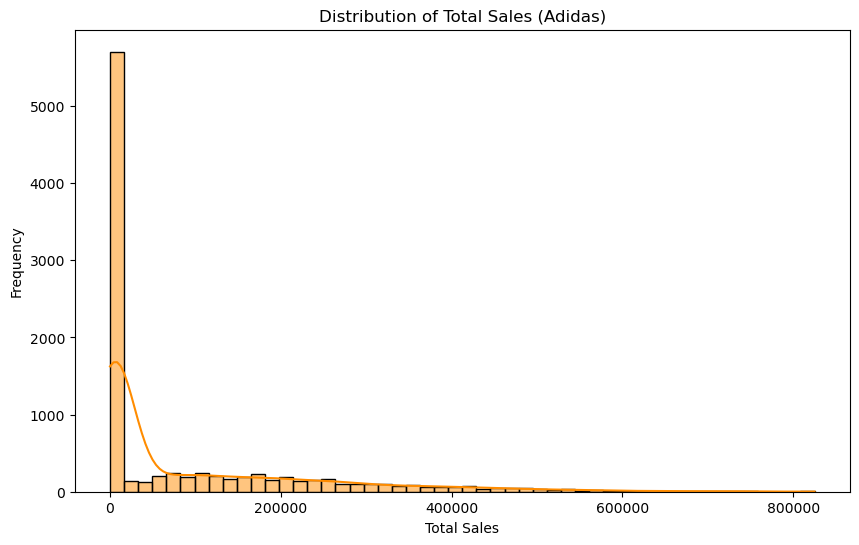

In [21]:
# Histogram + KDE
# Purpose: Check skewness, distribution shape and sales variability.
plt.figure(figsize=(10,6))
sns.histplot(df['Total Sales'], bins=50, kde=True, color='darkorange')
plt.title("Distribution of Total Sales (Adidas)")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()

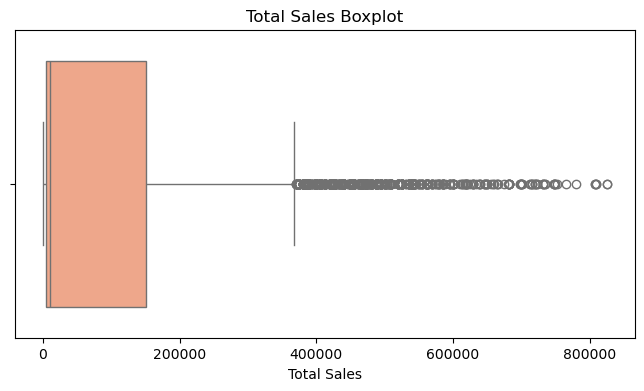

In [22]:
# Boxplot (for Outliers)
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Total Sales'], color='lightsalmon')
plt.title("Total Sales Boxplot")
plt.show()

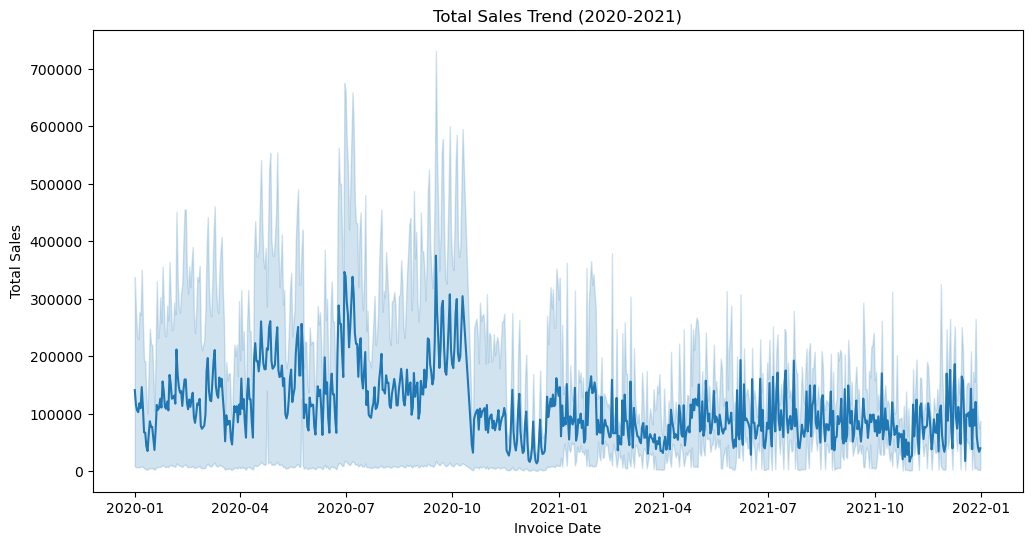

In [23]:
# Total Sales over time
plt.figure(figsize=(12,6))
sns.lineplot(x=df["Invoice Date"], y=df['Total Sales'])
plt.title("Total Sales Trend (2020-2021)")
plt.show()

### 2. Temporal Feature Analysis
#### Understand how time-related variables affect sales.
#### Purpose: Reveal seasonality and monthly fluctuations in Adidas's sales.

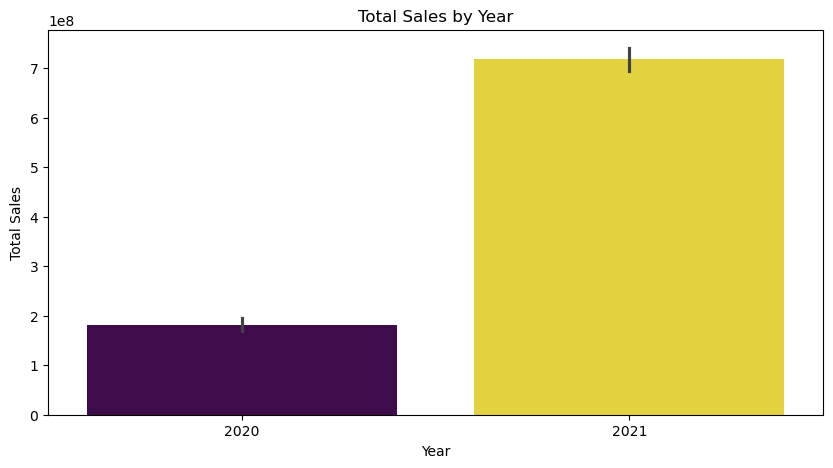

In [24]:
# Yearly Sales Trend
plt.figure(figsize=(10,5))
sns.barplot(x='Year', y='Total Sales', hue='Year', legend=False, palette='viridis', data=df, estimator=sum)
plt.title("Total Sales by Year")
plt.show()

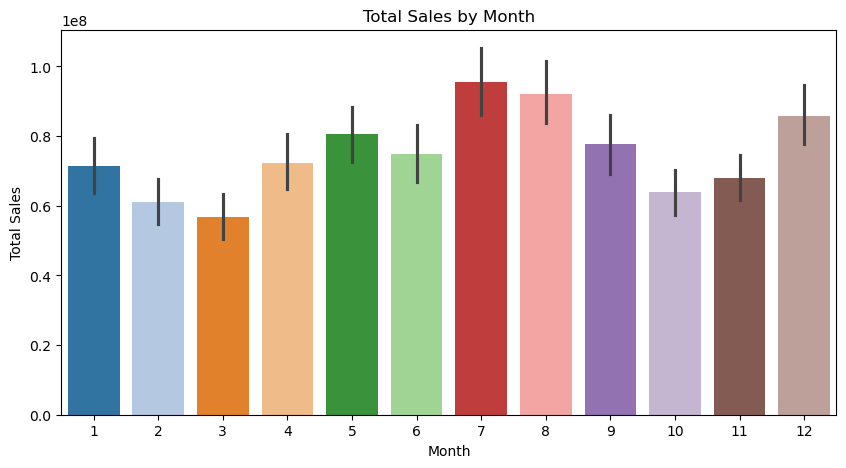

In [25]:
# Monthly Sales Trend
plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='Total Sales', hue='Month', legend=False, palette='tab20', data=df, estimator=sum)
plt.title("Total Sales by Month")
plt.show()

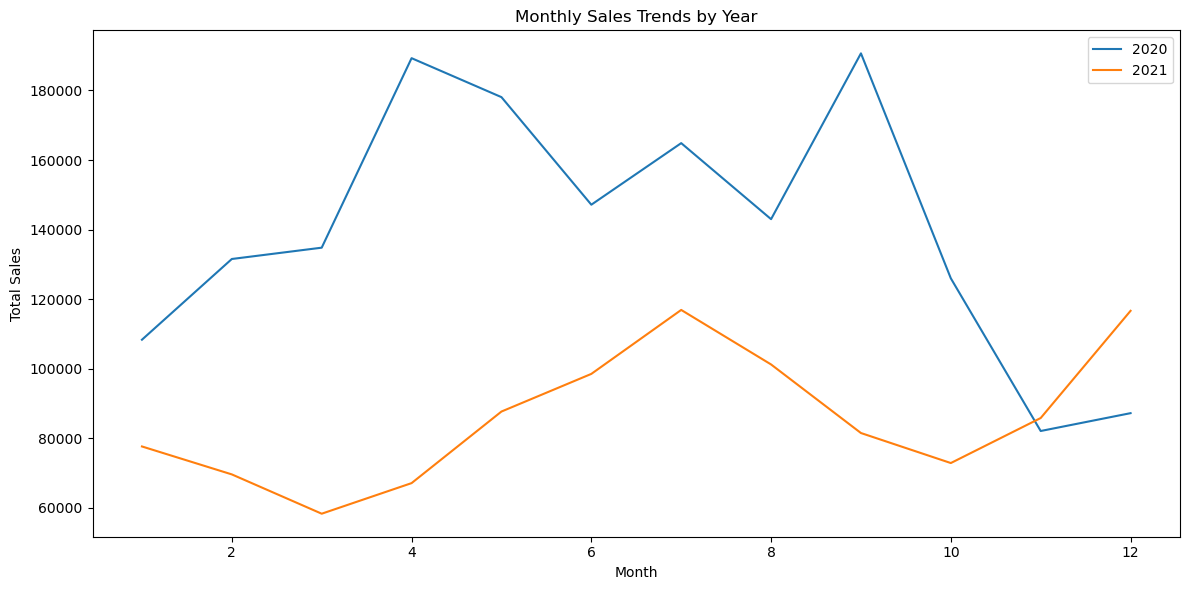

In [26]:
# Monthly Sales Trend (Line Plot)
pivot_table = df.pivot_table(index='Month', columns='Year', values='Total Sales')

plt.figure(figsize=(12, 6))
for year in pivot_table.columns:
    sns.lineplot(x=pivot_table.index, y=pivot_table[year], label=str(year))

plt.title("Monthly Sales Trends by Year")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.legend()
plt.tight_layout()
plt.show()

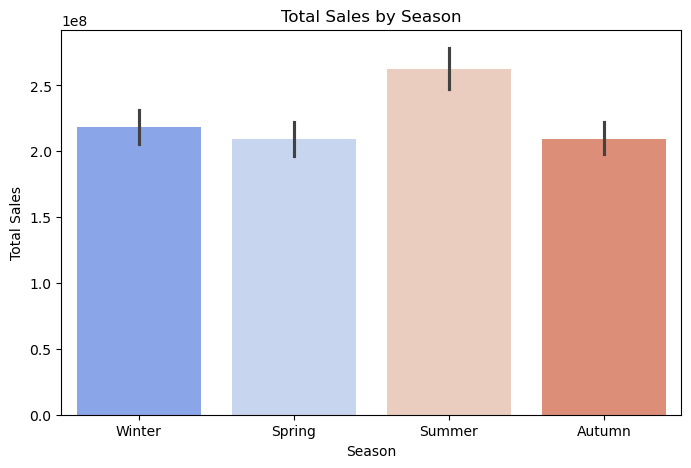

In [27]:
# Seasonal Sales
plt.figure(figsize=(8,5))
sns.barplot(x='Season', y='Total Sales', hue='Season', legend=False, palette='coolwarm', data=df, estimator=sum)
plt.title("Total Sales by Season")
plt.show()

### 3. Categorical Feature Analysis
#### Purpose: Identify top-performing retailers, products, and sales methods.

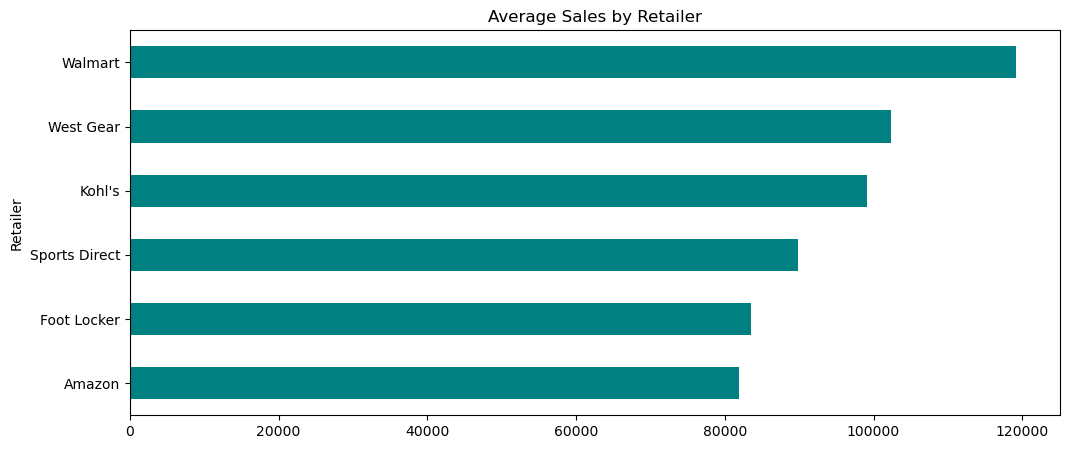

In [28]:
# Average Sales by Retailer
plt.figure(figsize=(12,5))
retailer_sales = df.groupby('Retailer', observed=True)['Total Sales'].mean().sort_values(ascending=True)
retailer_sales.plot(kind='barh', color='teal')
plt.title("Average Sales by Retailer")
plt.show()

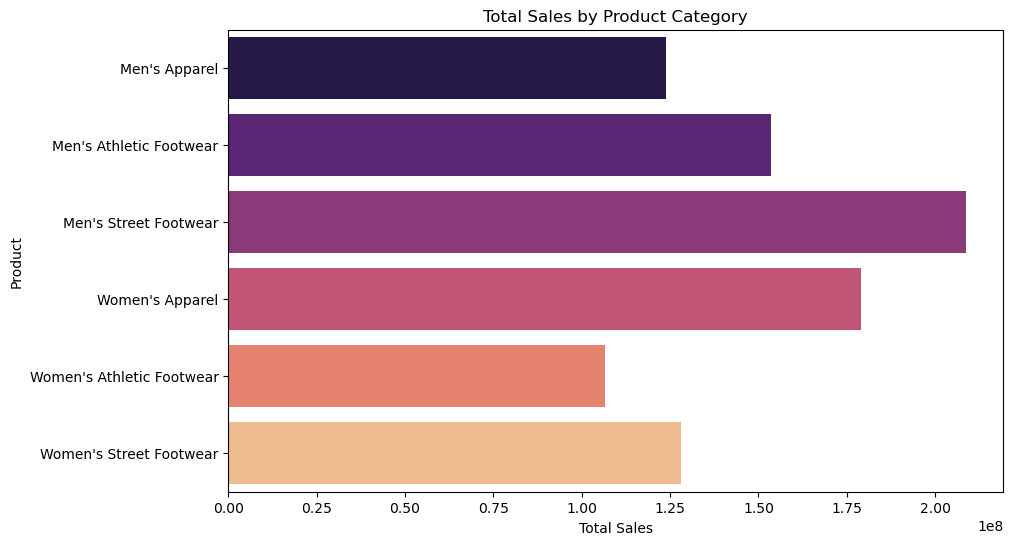

In [29]:
# Total Sales by Product Category
plt.figure(figsize=(10,6))
sns.barplot(x='Total Sales', y='Product', data=df, estimator=sum, palette='magma', errorbar=None)
plt.title("Total Sales by Product Category")
plt.show()

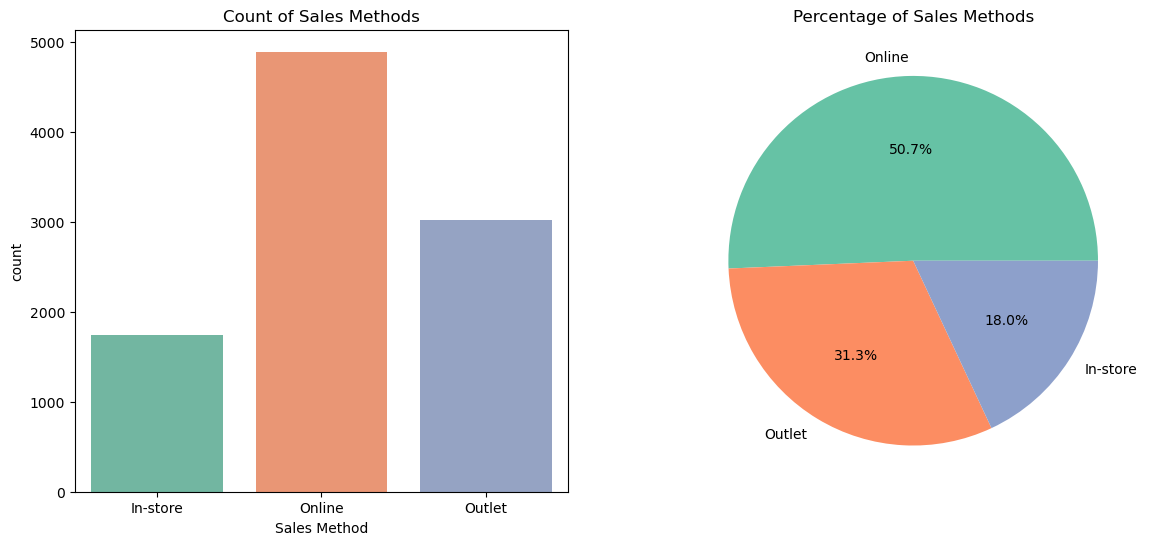

In [30]:
# Sales Method Distribution (Count and Percentage)
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data=df, x='Sales Method', hue='Sales Method', ax=ax[0], palette='Set2', legend=False)
ax[0].set_title("Count of Sales Methods")

ax[1].pie(df['Sales Method'].value_counts().values, 
          labels = df['Sales Method'].value_counts().index, 
          autopct = '%1.1f%%', colors=sns.color_palette('Set2'))
ax[1].set_title("Percentage of Sales Methods")
plt.show()

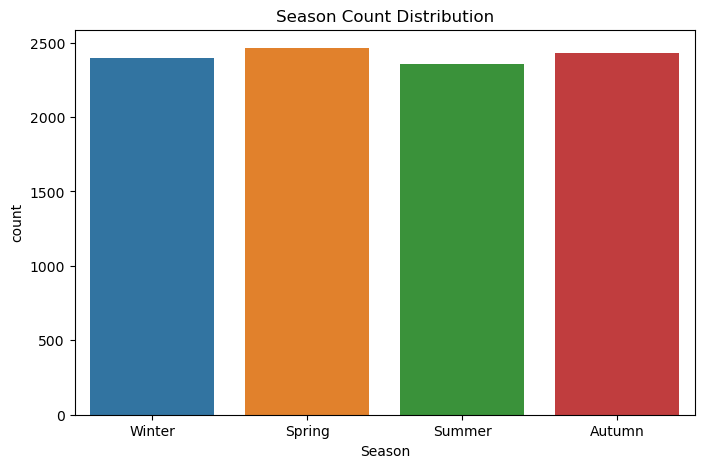

In [31]:
# Seasonal Count Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Season', hue='Season', legend=False, palette='tab10', data=df)
plt.title("Season Count Distribution")
plt.show()

### 4. Numerical Feature Analysis
#### Understand independent numeric variable distributions and relationships.
#### Purpose: Detect key predictors and observe how lags/rolling features relate to the target.

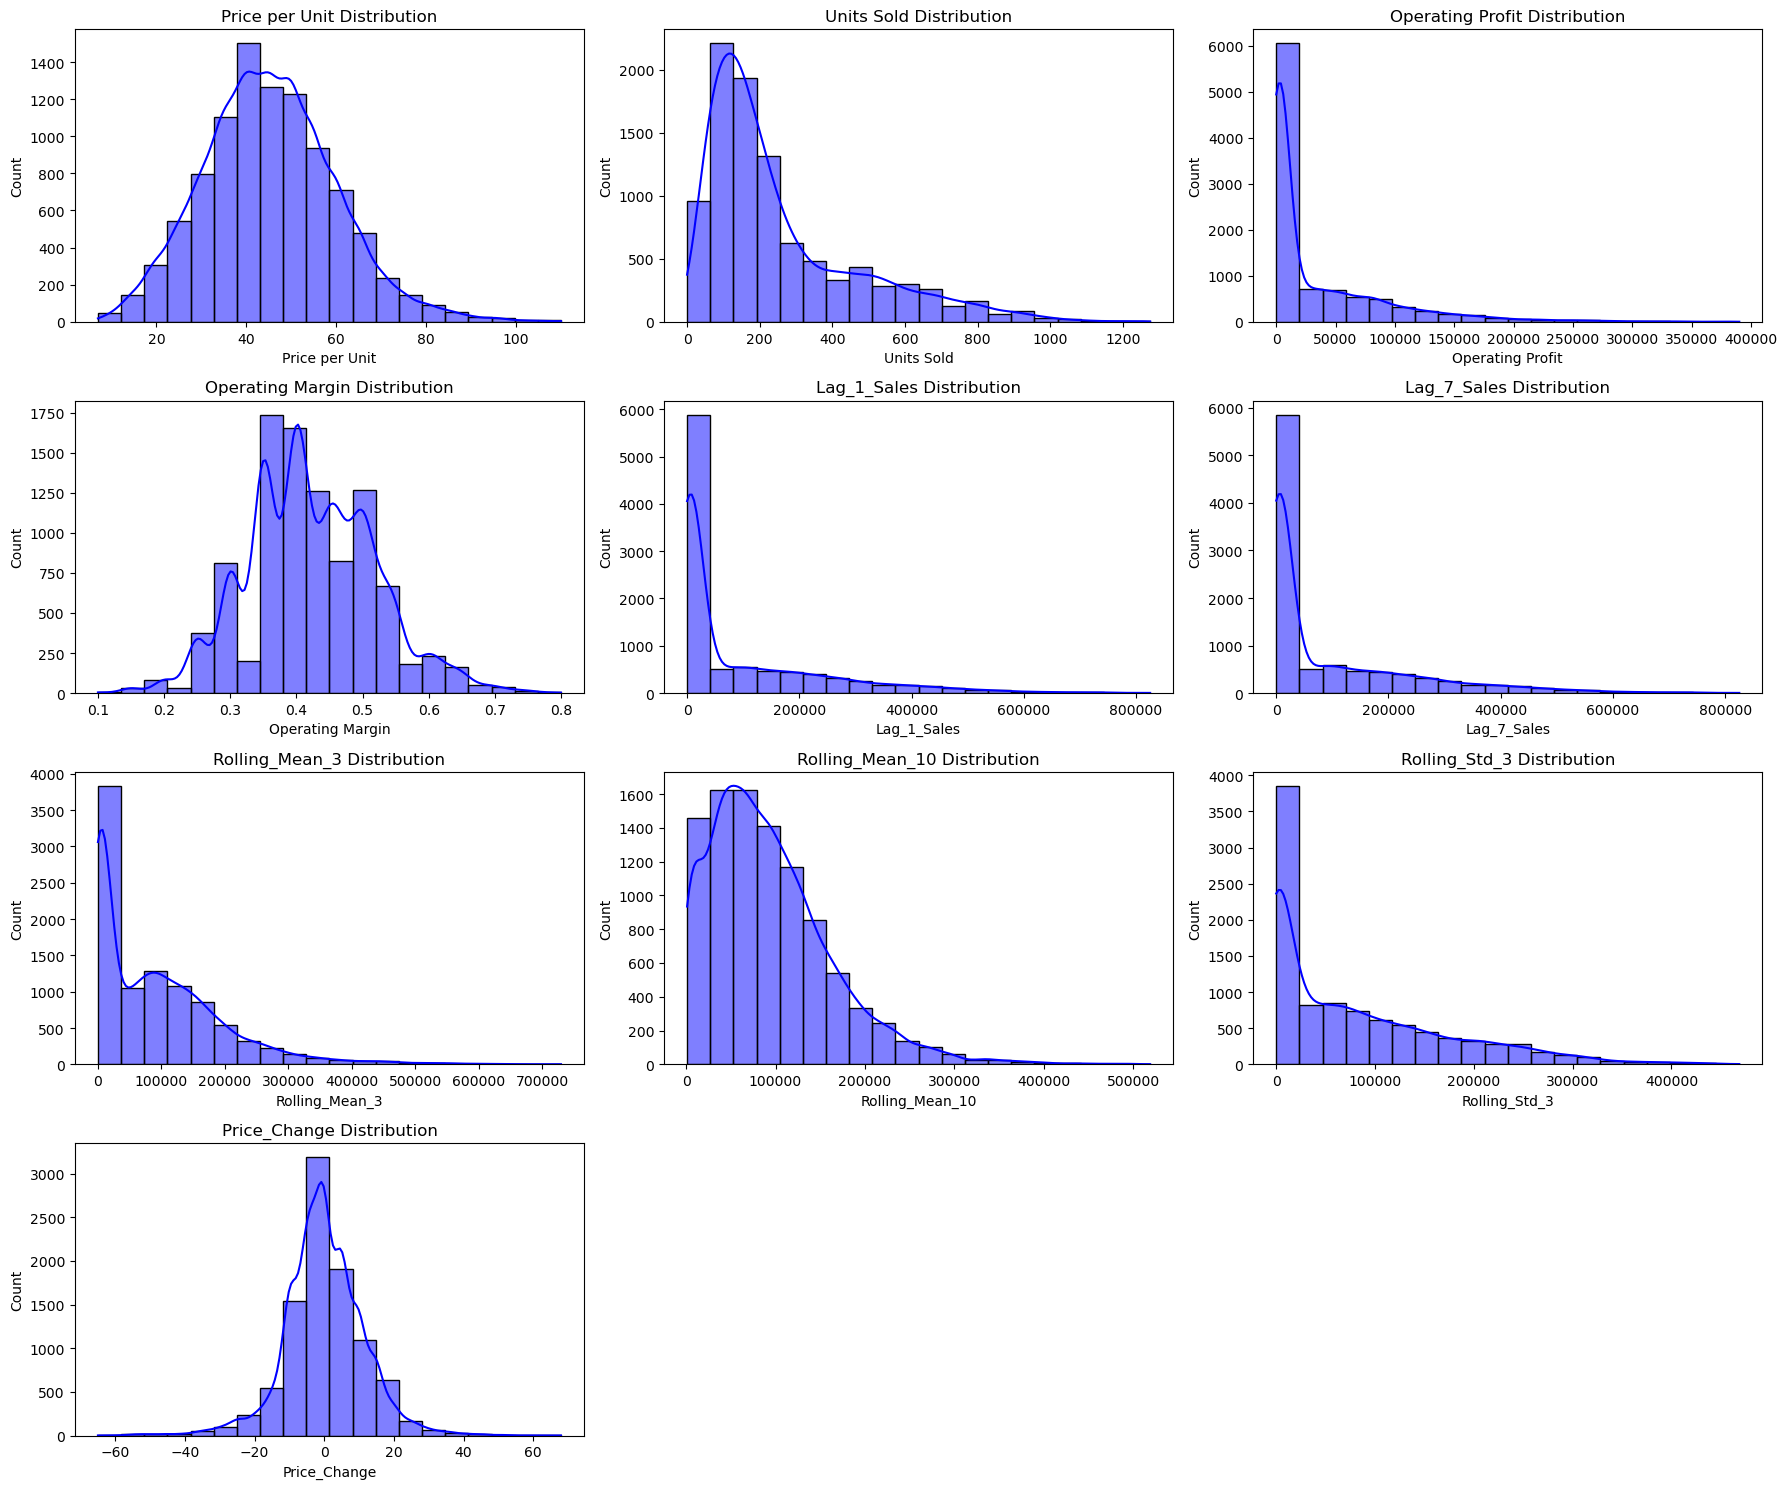

In [32]:
# Histograms (Univariate)
num_features = ['Price per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin', 'Lag_1_Sales', 
                'Lag_7_Sales', 'Rolling_Mean_3', 'Rolling_Mean_10', 'Rolling_Std_3', 'Price_Change']

plt.figure(figsize=(18,15))
for i, col in enumerate(num_features):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

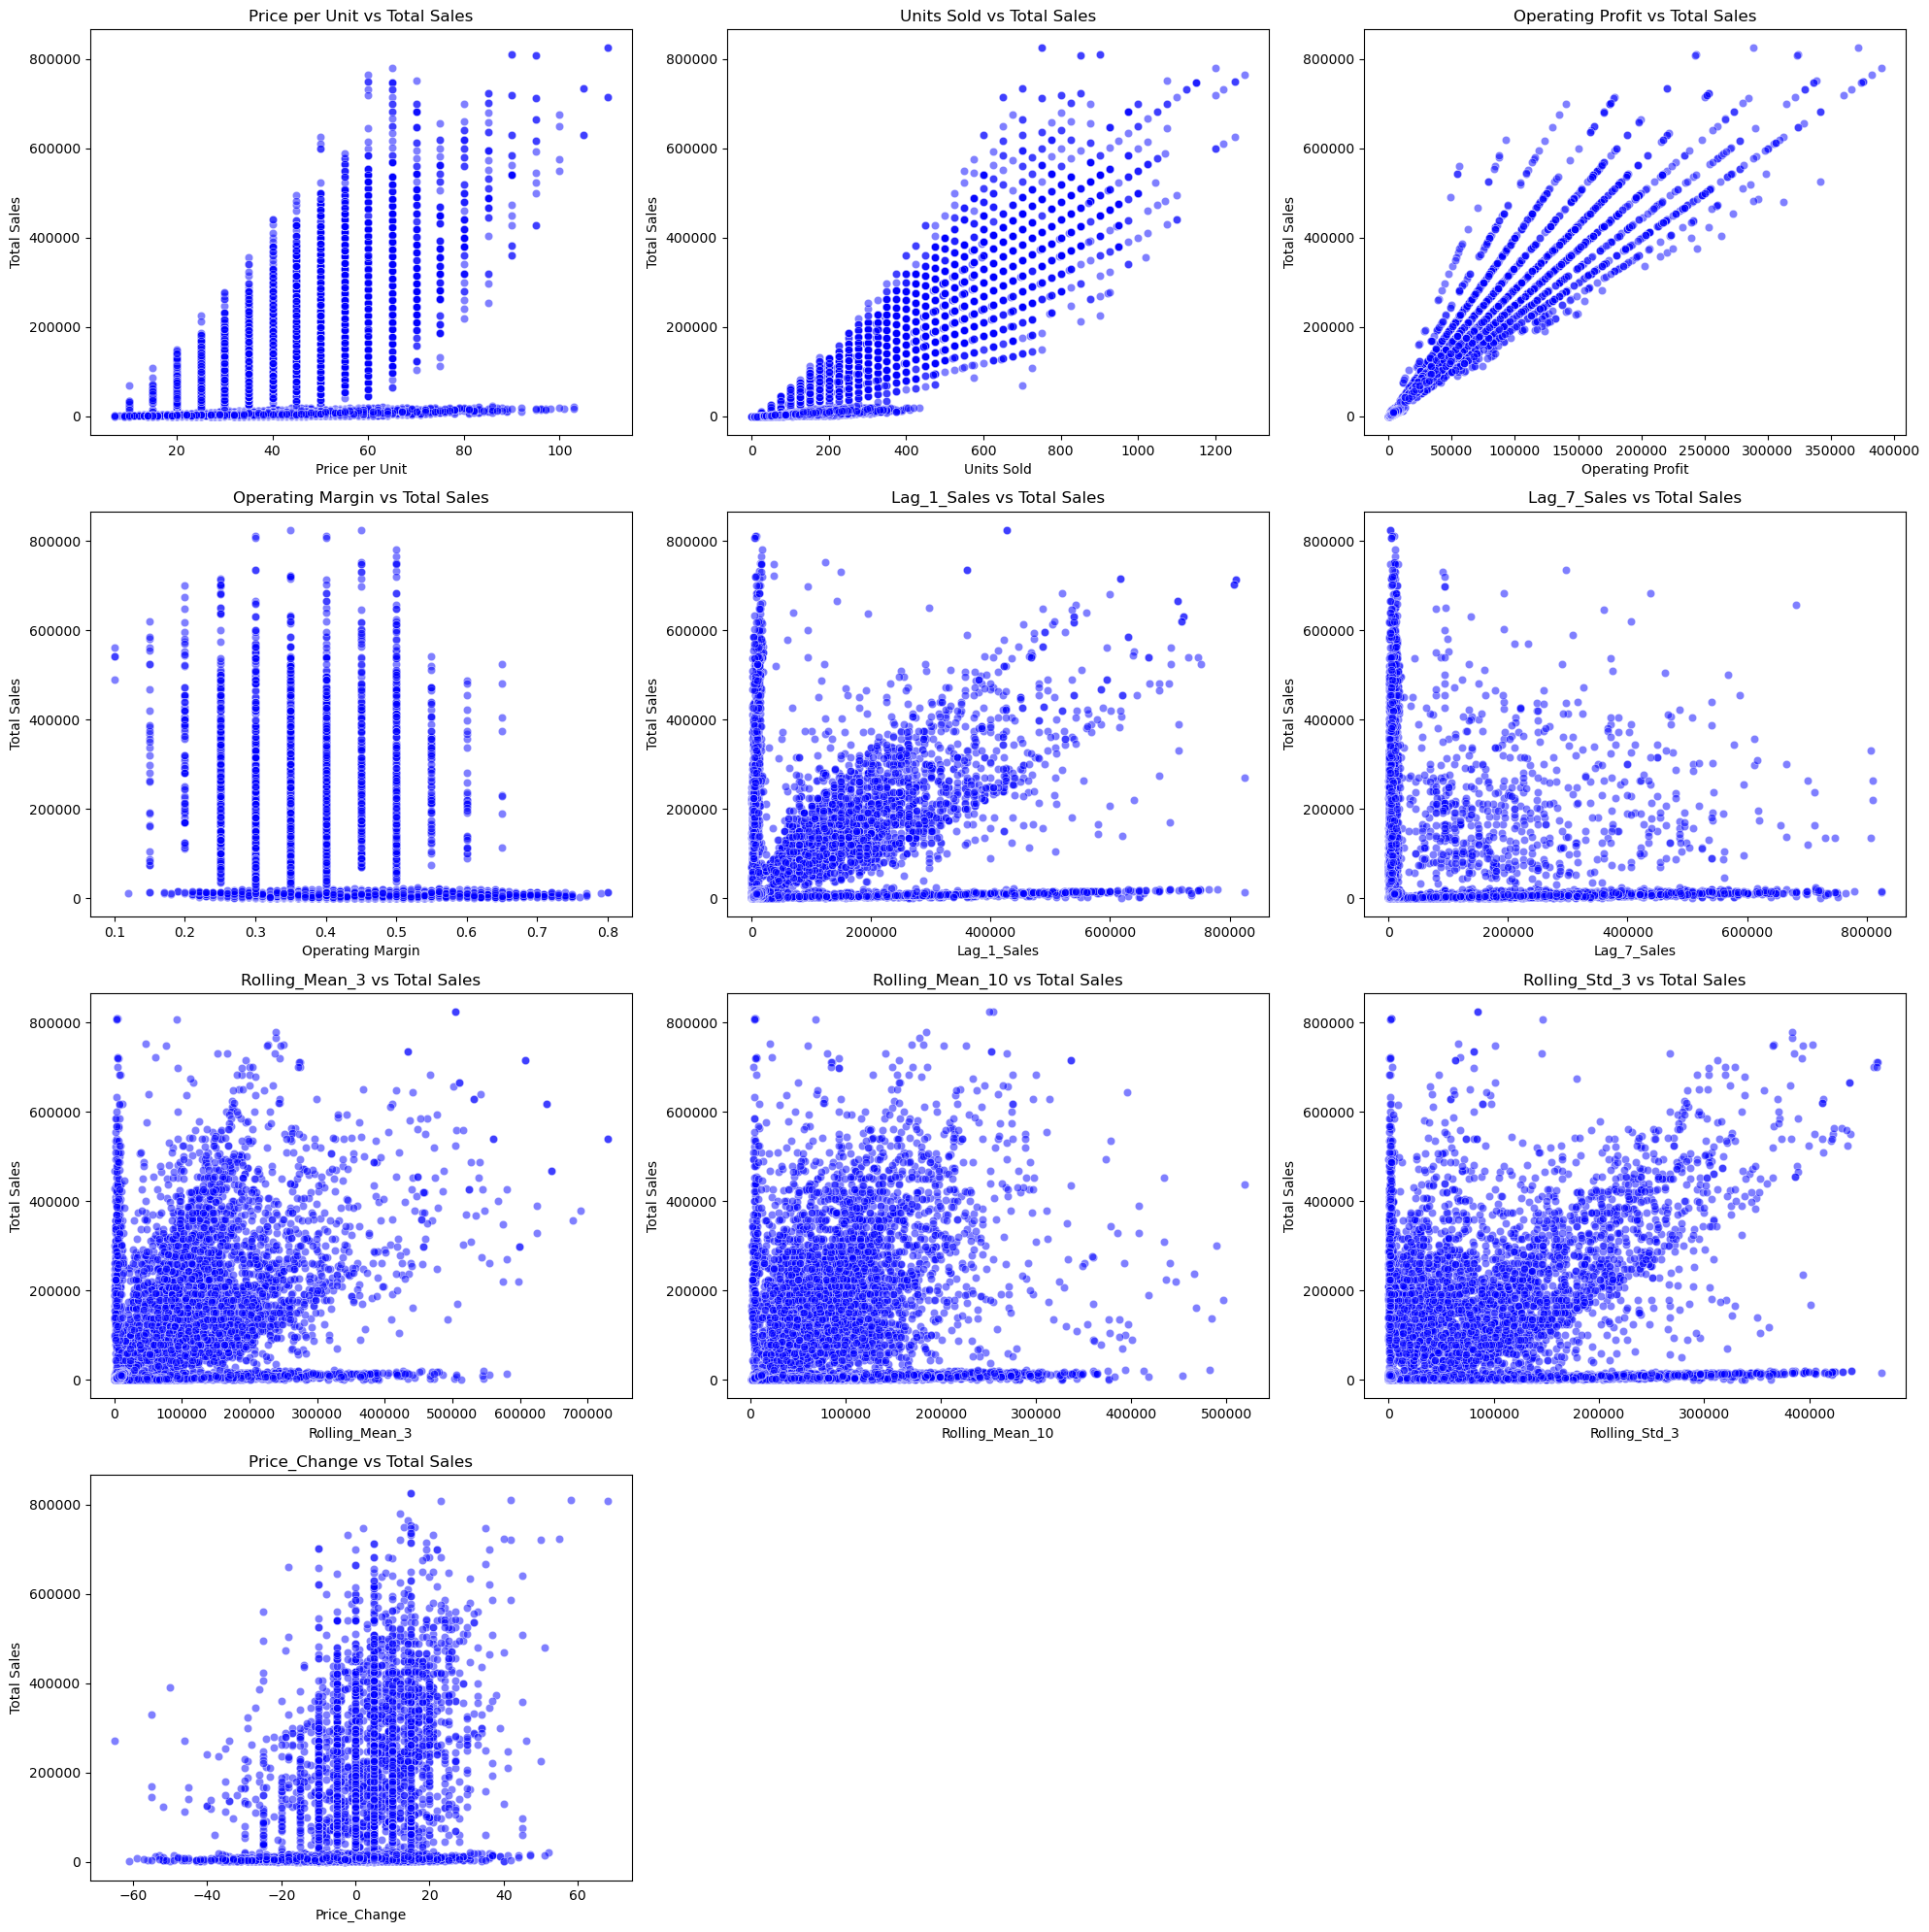

In [33]:
# Scatterplots vs Total Sales (Bivariate)
cols = ['Price per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin', 'Lag_1_Sales', 
        'Lag_7_Sales', 'Rolling_Mean_3', 'Rolling_Mean_10', 'Rolling_Std_3', 'Price_Change']

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
ax = ax.flatten()

for i, col in enumerate(cols):
    sns.scatterplot(data=df, x=col, y='Total Sales', ax=ax[i], color='blue', alpha=0.5)
    ax[i].set_title(f'{col} vs Total Sales')

for j in range(len(cols), len(ax)):
    ax[j].set_visible(False)
plt.tight_layout()
plt.show()

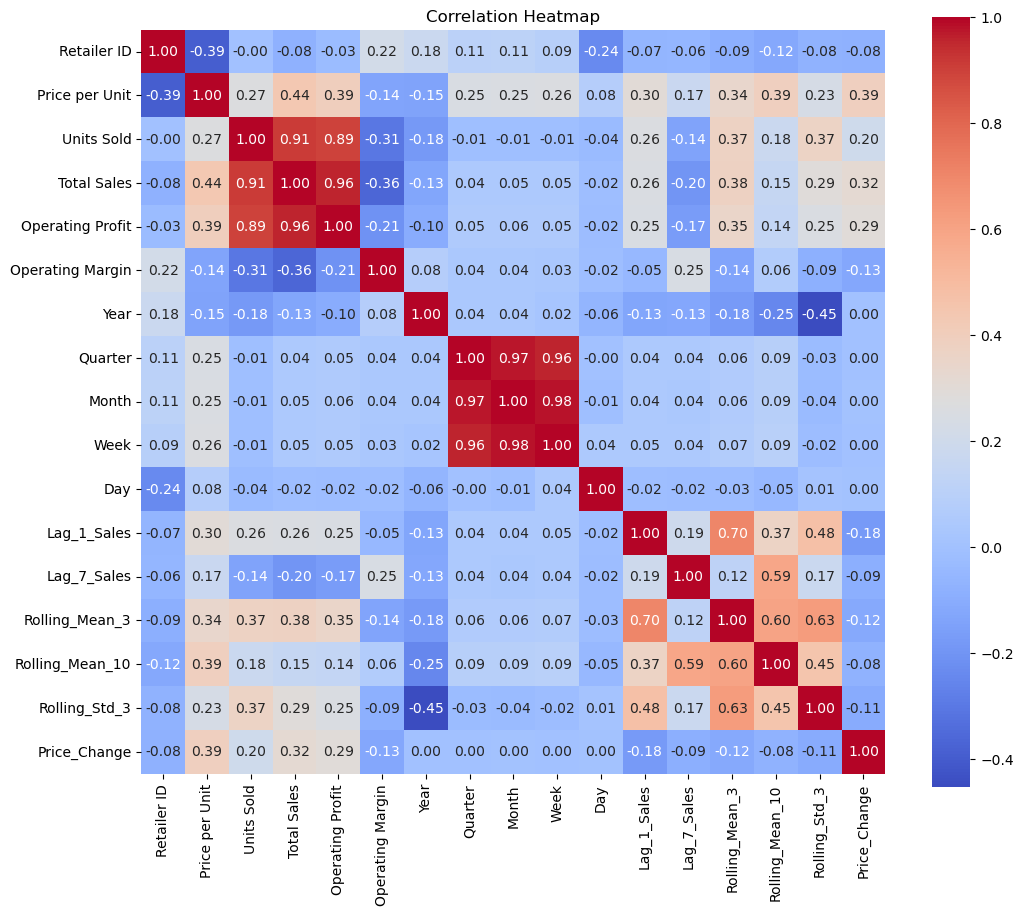

In [34]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

### 5. Pair Plot
#### Purpose: Visual overview of relationships across top numeric features.

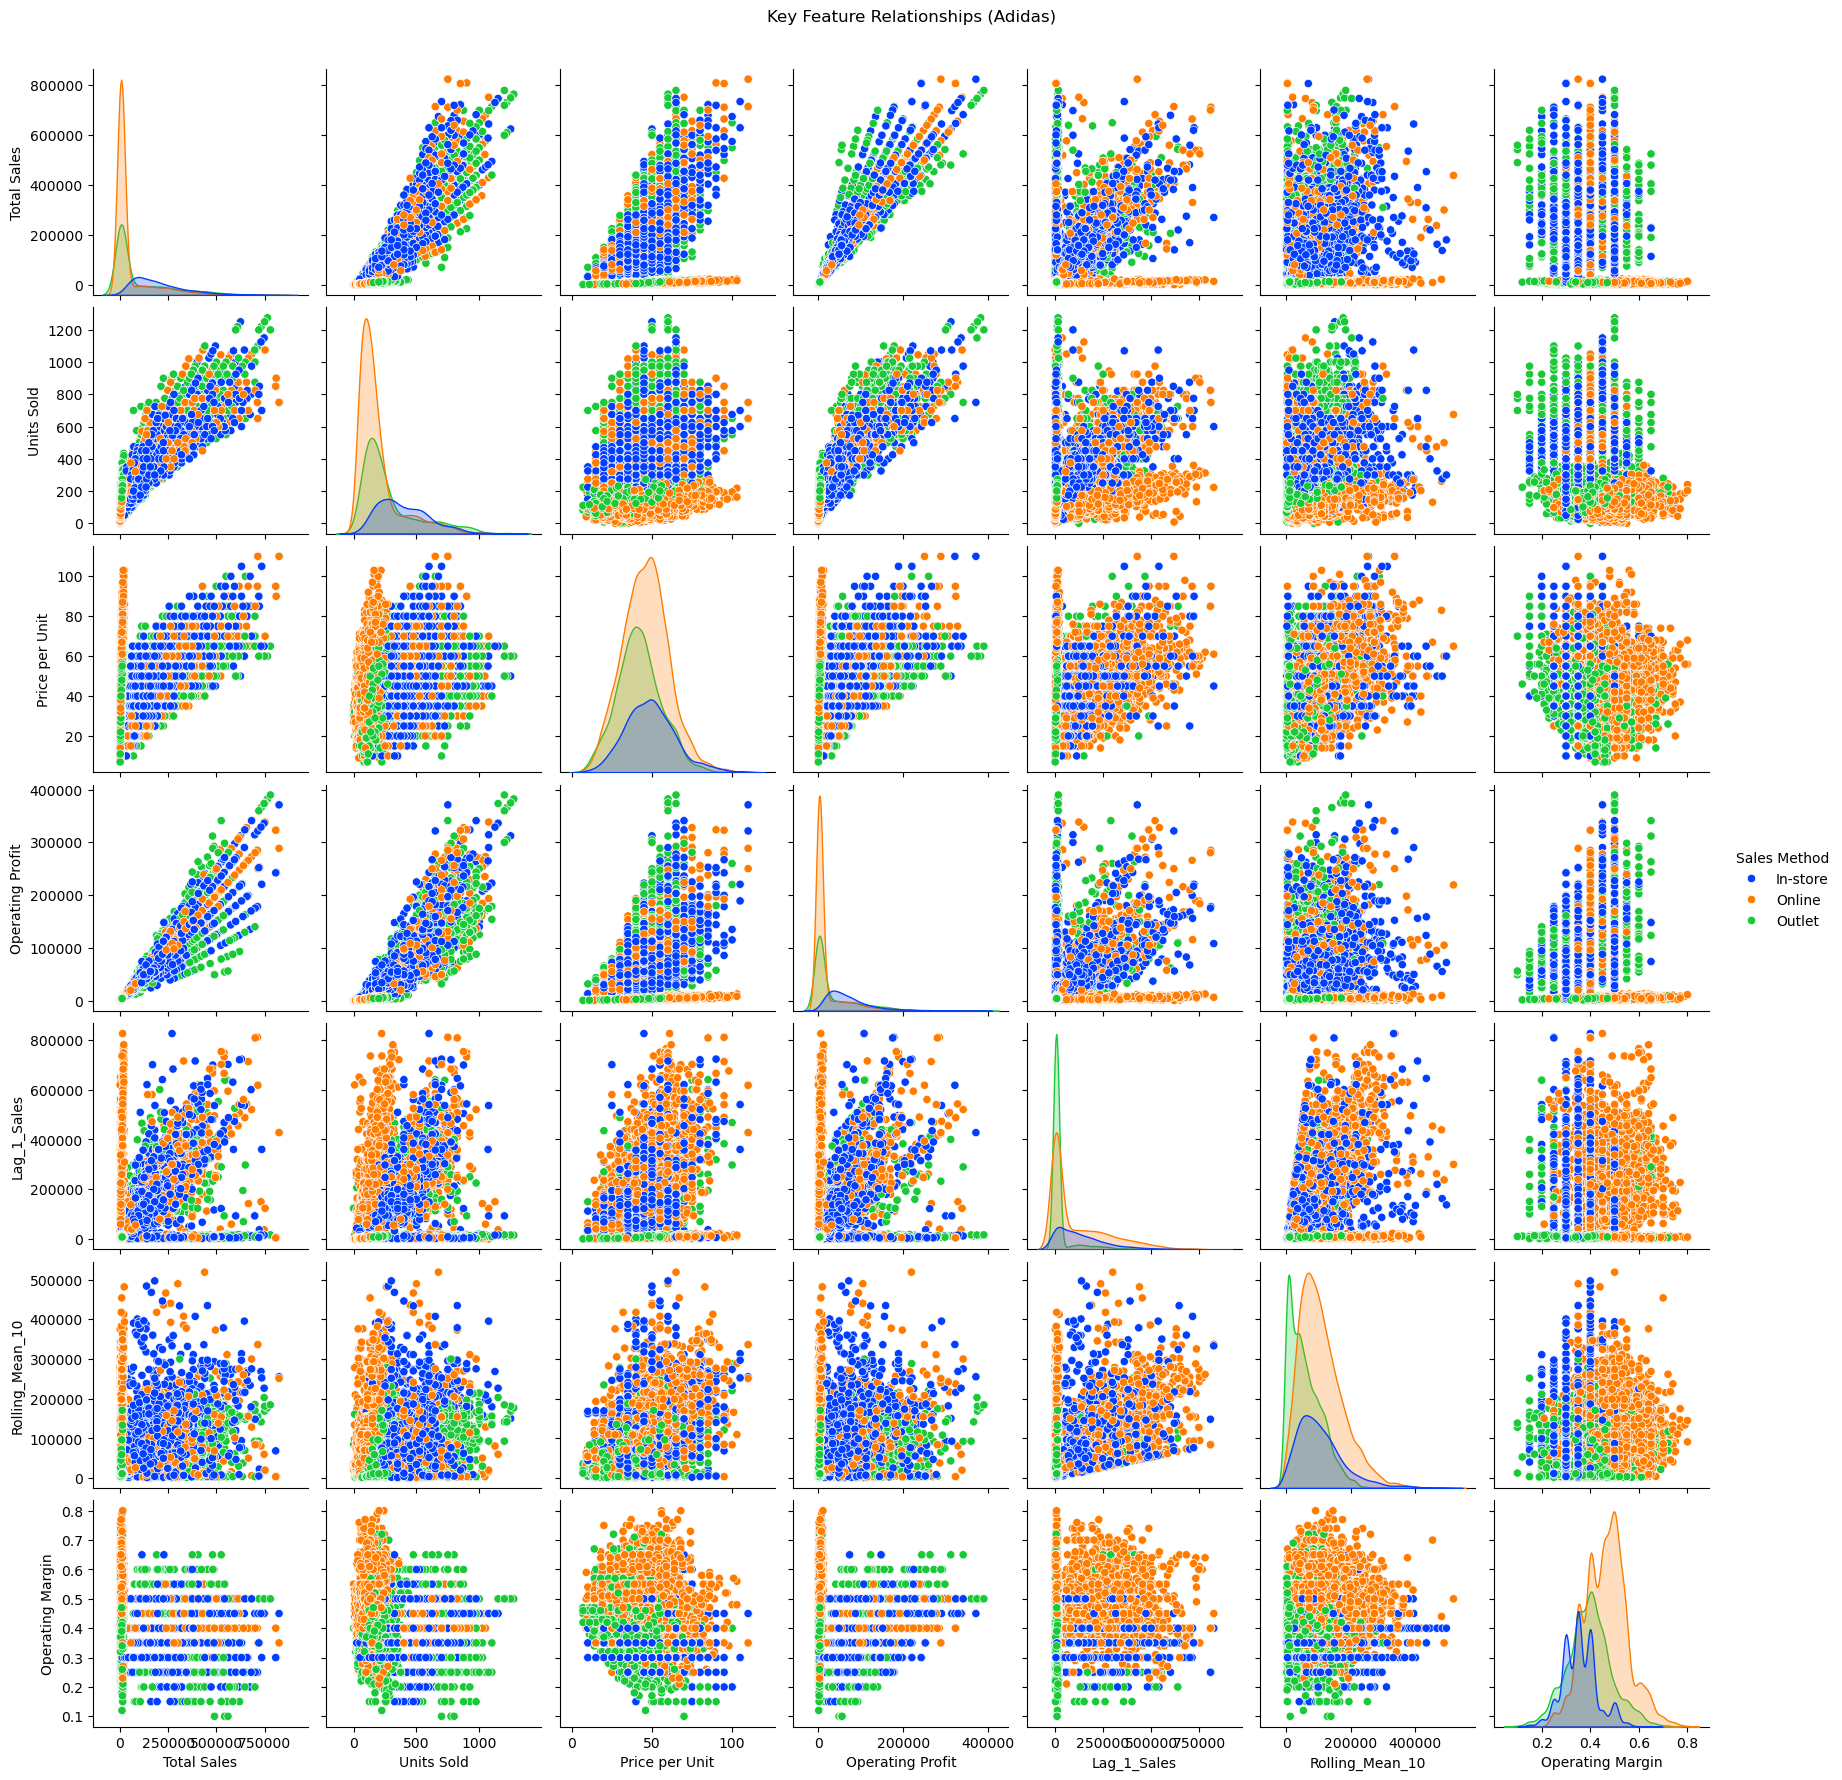

In [35]:
# Select features
pair_features = ['Total Sales', 'Units Sold', 'Price per Unit', 'Operating Profit', 'Lag_1_Sales', 
                 'Rolling_Mean_10', 'Operating Margin']

# Create pairplot with Sales Method as hue
g = sns.pairplot(df[pair_features + ['Sales Method']], hue='Sales Method', diag_kind='kde', corner=False, palette='bright')
g.fig.suptitle("Key Feature Relationships (Adidas)", y=1.02)
plt.show()

## Outlier Detection

COMPREHENSIVE OUTLIER ANALYSIS (IQR METHOD)


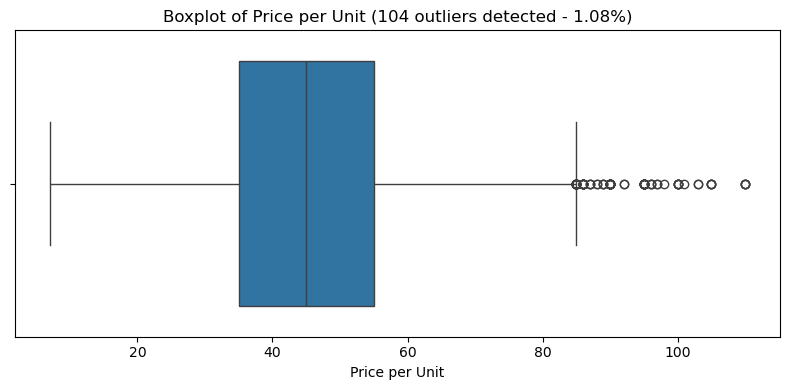


--- Price per Unit ---
Outliers Detected: 104 (1.08%)
IQR Bounds: [5.00, 85.00]
Data Range: [7.00, 110.00]
--------------------------------------------------


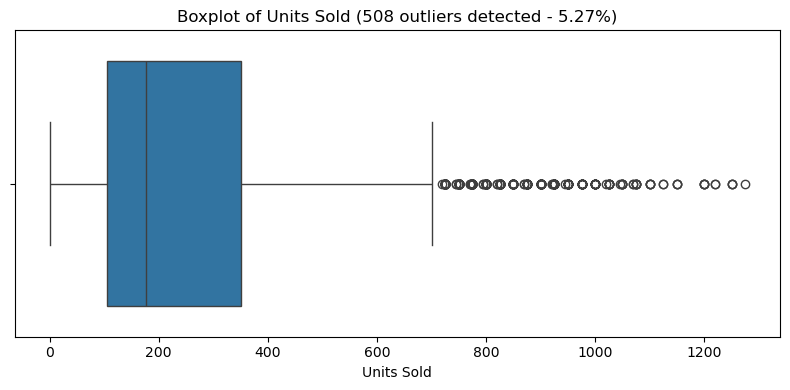


--- Units Sold ---
Outliers Detected: 508 (5.27%)
IQR Bounds: [-260.00, 716.00]
Data Range: [0.00, 1275.00]
--------------------------------------------------


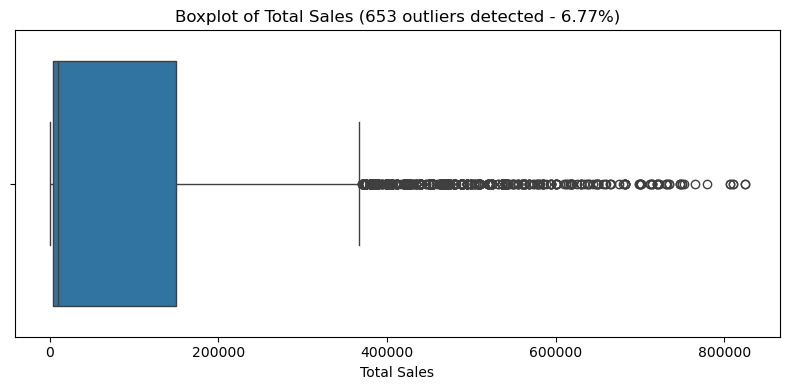


--- Total Sales ---
Outliers Detected: 653 (6.77%)
IQR Bounds: [-214363.75, 368618.25]
Data Range: [0.00, 825000.00]
--------------------------------------------------


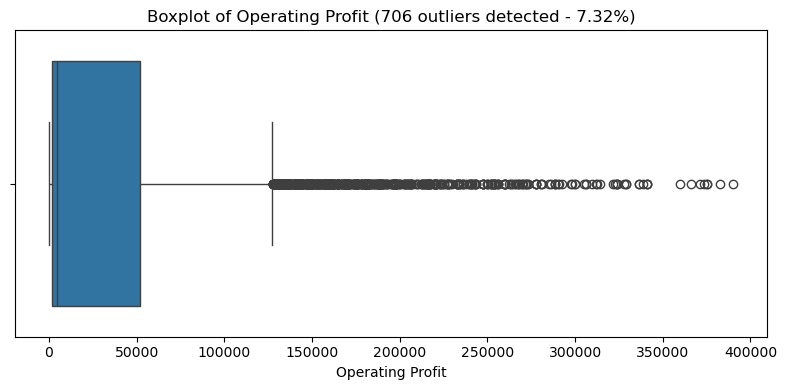


--- Operating Profit ---
Outliers Detected: 706 (7.32%)
IQR Bounds: [-73289.37, 127273.62]
Data Range: [0.00, 390000.00]
--------------------------------------------------


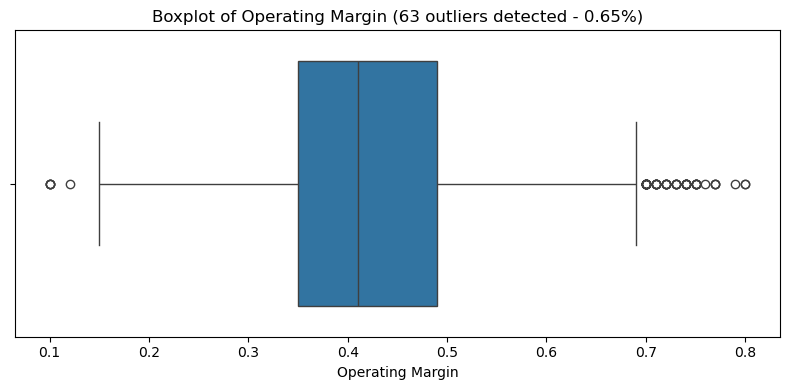


--- Operating Margin ---
Outliers Detected: 63 (0.65%)
IQR Bounds: [0.14, 0.70]
Data Range: [0.10, 0.80]
--------------------------------------------------


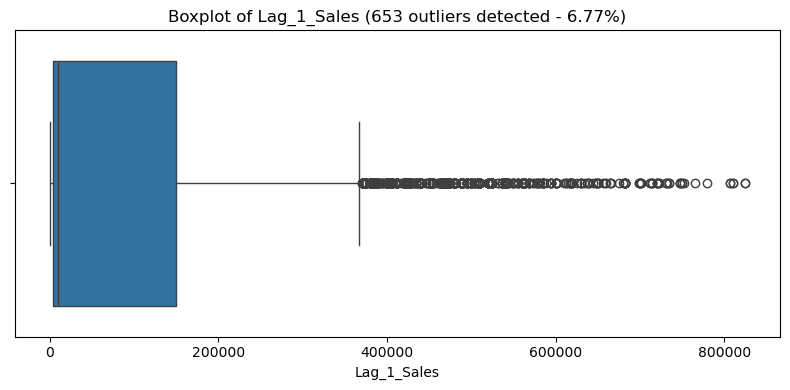


--- Lag_1_Sales ---
Outliers Detected: 653 (6.77%)
IQR Bounds: [-214360.00, 368616.00]
Data Range: [0.00, 825000.00]
--------------------------------------------------


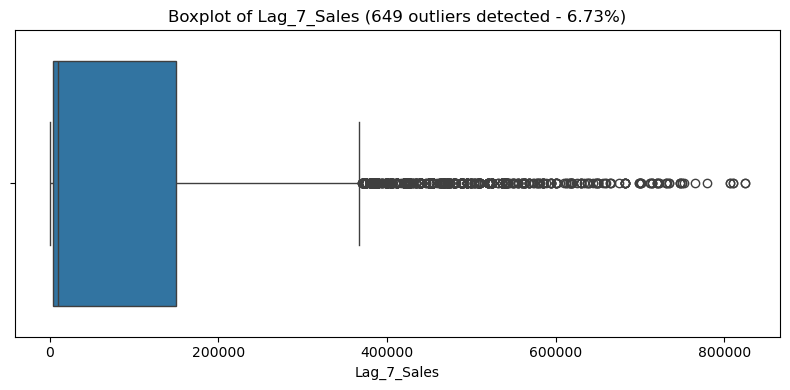


--- Lag_7_Sales ---
Outliers Detected: 649 (6.73%)
IQR Bounds: [-214314.37, 368588.62]
Data Range: [0.00, 825000.00]
--------------------------------------------------


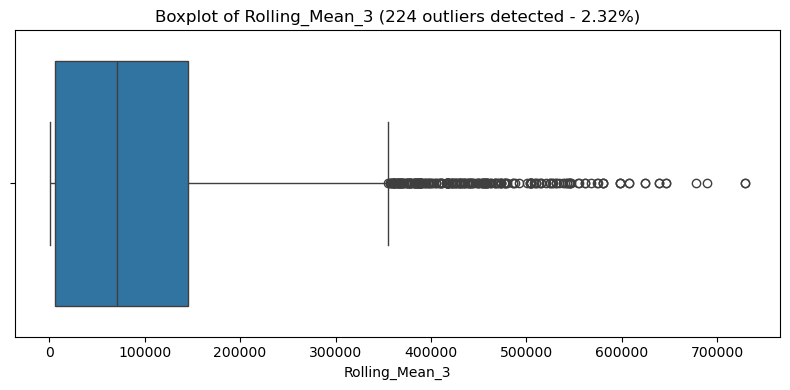


--- Rolling_Mean_3 ---
Outliers Detected: 224 (2.32%)
IQR Bounds: [-203458.87, 355241.46]
Data Range: [493.00, 729166.67]
--------------------------------------------------


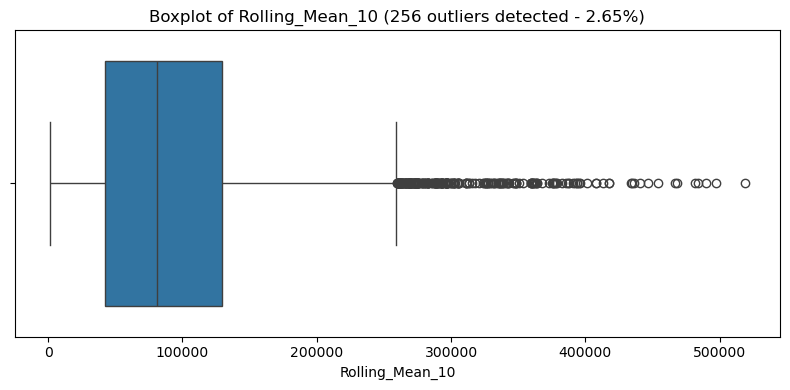


--- Rolling_Mean_10 ---
Outliers Detected: 256 (2.65%)
IQR Bounds: [-87441.54, 259333.96]
Data Range: [1077.90, 519000.00]
--------------------------------------------------


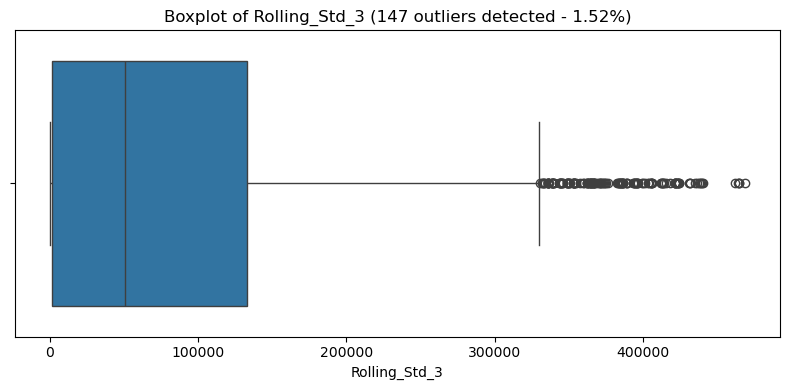


--- Rolling_Std_3 ---
Outliers Detected: 147 (1.52%)
IQR Bounds: [-194950.56, 330062.36]
Data Range: [22.34, 468636.76]
--------------------------------------------------


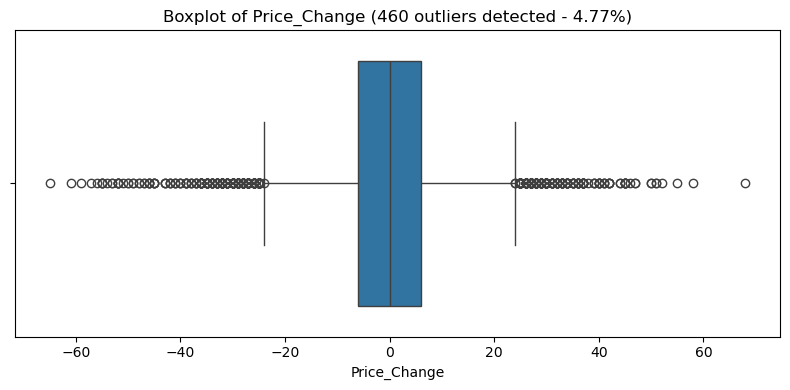


--- Price_Change ---
Outliers Detected: 460 (4.77%)
IQR Bounds: [-24.00, 24.00]
Data Range: [-65.00, 68.00]
--------------------------------------------------

SUMMARY STATISTICS FOR ALL TARGETED NUMERIC COLUMNS


Price per Unit   Units Sold    Total Sales  Operating Profit  Operating Margin    Lag_1_Sales    Lag_7_Sales  Rolling_Mean_3  Rolling_Mean_10  Rolling_Std_3  Price_Change
count     9648.000000  9648.000000    9648.000000       9648.000000       9648.000000    9648.000000    9648.000000     9648.000000      9648.000000    9648.000000   9648.000000
mean        45.216625   256.930037   93273.437500      34425.244761          0.422991   93326.348787   93384.182594    93228.940187     93093.365676   81165.544752      0.003213
std         14.705397   214.252030  141916.016727      54193.113713          0.097197  141900.119353  141520.856189   100223.495675     68748.488193   91949.335775     11.503971
min          7.000000     0.000000       0.000000          0.000000          0.100000       0.000000       0.000000      493.000000      1077.900000      22.338304    -65.000000
25%         35.000000   106.000000    4254.500000       1921.752500          0.350000    4256.000000    4274.250000     6053.750000     42599.275000    1929.287302     -6.000000
50%         45.000000   176.000000    9576.000000       4371.420000          0.410000    9581.000000    9624.500000    71250.000000     80991.000000   51018.990826      0.000000
75%         55.000000   350.000000  150000.000000      52062.500000          0.490000  150000.000000  150000.000000   145728.833333    129293.150000  133182.516344      6.000000
max        110.000000  1275.000000  825000.000000     390000.000000          0.800000  825000.000000  825000.000000   729166.666667    519000.000000  468636.756453     68.000000

In [36]:
# Define the columns for outlier analysis
numeric_list = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 
                'Lag_1_Sales', 'Lag_7_Sales', 'Rolling_Mean_3', 'Rolling_Mean_10', 'Rolling_Std_3', 'Price_Change']

print("=" * 60)
print("COMPREHENSIVE OUTLIER ANALYSIS (IQR METHOD)")
print("=" * 60)

# Dictionary to store results for final summary
outlier_summary = {}

for col in numeric_list:
    # 1. Calculate IQR bounds
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 2. Find and count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    
    outlier_summary[col] = outlier_count

    # 3. Visualization (Boxplot)
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    
    title_text = f'Boxplot of {col} ({outlier_count} outliers detected - {outlier_percent:.2f}%)'
    plt.title(title_text)
    plt.tight_layout()
    plt.show()

    # 4. Print consolidated statistics
    print(f"\n--- {col} ---")
    print(f"Outliers Detected: {outlier_count} ({outlier_percent:.2f}%)")
    print(f"IQR Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"Data Range: [{df[col].min():.2f}, {df[col].max():.2f}]")

    print("-" * 50)

# Summary Statistics for all 5 columns targeted for outlier detection
print("\n" + "=" * 60)
print("SUMMARY STATISTICS FOR ALL TARGETED NUMERIC COLUMNS")
print("=" * 60)
display(df[numeric_list].describe())

## Winsorization to Handle Outliers

FINAL TARGETED WINSORIZATION & VERIFICATION
Winsorization limits adjusted (Unemployment: 1% lower, 10% upper) and applied.
Summary Statistics After Final Targeted Winsorization:


Price per Unit   Units Sold    Total Sales  Operating Profit  Operating Margin    Lag_1_Sales    Lag_7_Sales  Rolling_Mean_3  Rolling_Mean_10  Rolling_Std_3  Price_Change
count     9648.000000  9648.000000    9648.000000        9648.00000       9648.000000    9648.000000    9648.000000     9648.000000      9648.000000    9648.000000   9648.000000
mean        45.163972   239.281613   79890.688433       28729.35730          0.422838   79943.599719   80100.417772    92450.466514     92517.665593   80795.020045     -0.552757
std         14.430650   171.632151  107187.381228       38122.16667          0.095497  107172.940180  107013.664524    96908.725179     66454.110106   90688.740291      9.818764
min         14.000000    26.000000     825.000000         342.24000          0.200000     825.000000     825.000000     1230.000000      2652.400000     223.240529    -32.000000
25%         35.000000   106.000000    4254.500000        1921.75250          0.350000    4256.000000    4274.250000     6053.750000     42599.275000    1929.287302     -6.000000
50%         45.000000   176.000000    9576.000000        4371.42000          0.410000    9581.000000    9624.500000    71250.000000     80991.000000   51018.990826      0.000000
75%         55.000000   350.000000  150000.000000       52062.50000          0.490000  150000.000000  150000.000000   145728.833333    129293.150000  133182.516344      6.000000
max         85.000000   575.000000  300000.000000      108500.00000          0.670000  300000.000000  300000.000000   443750.000000    310837.100000  362336.088587     14.000000


VERIFYING OUTLIER REMOVAL VIA BOXPLOTS:


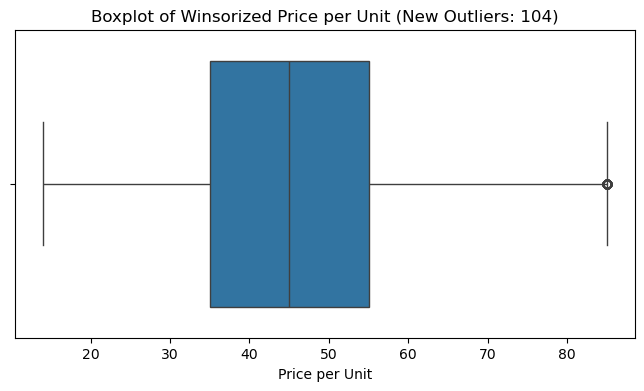

'Price per Unit' final range: [14.00, 85.00]
New outliers detected by IQR: 104
------------------------------


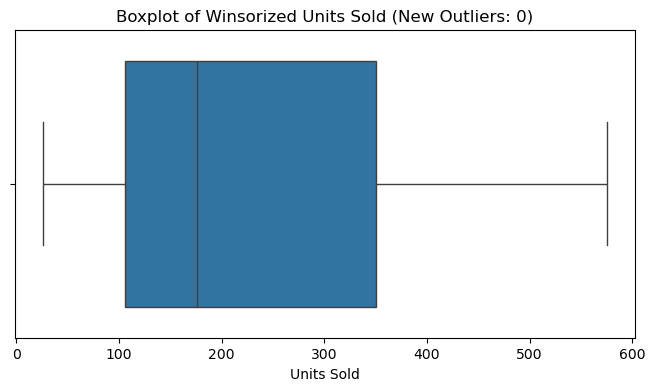

'Units Sold' final range: [26.00, 575.00]
New outliers detected by IQR: 0
------------------------------


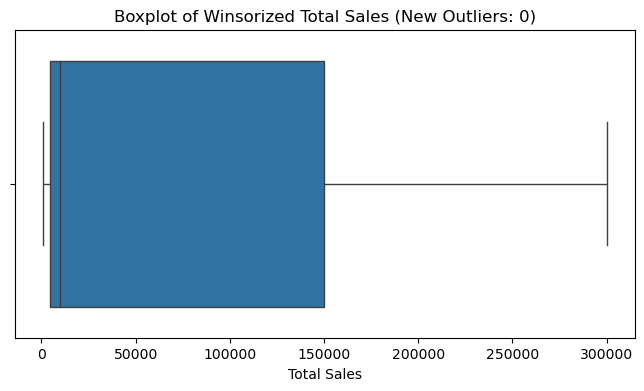

'Total Sales' final range: [825.00, 300000.00]
New outliers detected by IQR: 0
------------------------------


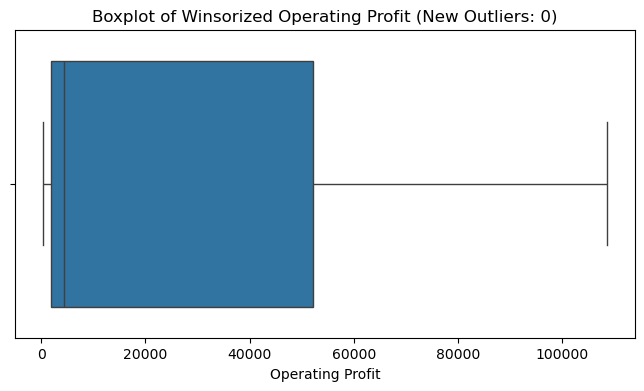

'Operating Profit' final range: [342.24, 108500.00]
New outliers detected by IQR: 0
------------------------------


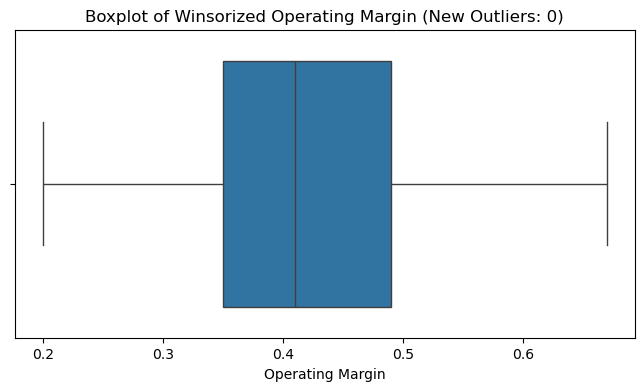

'Operating Margin' final range: [0.20, 0.67]
New outliers detected by IQR: 0
------------------------------


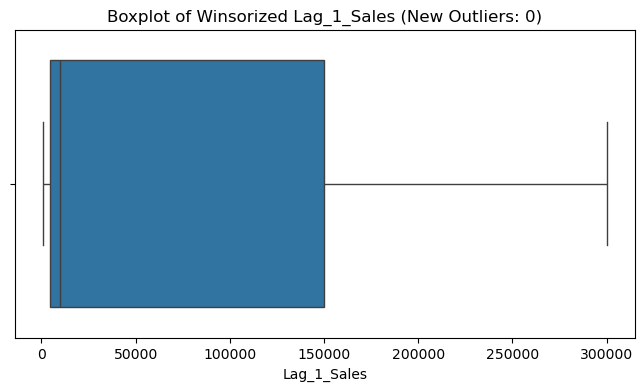

'Lag_1_Sales' final range: [825.00, 300000.00]
New outliers detected by IQR: 0
------------------------------


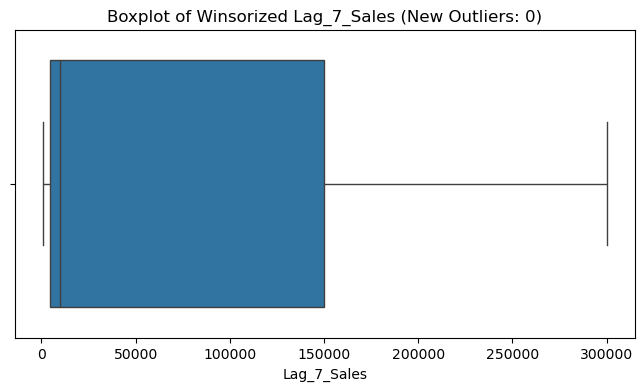

'Lag_7_Sales' final range: [825.00, 300000.00]
New outliers detected by IQR: 0
------------------------------


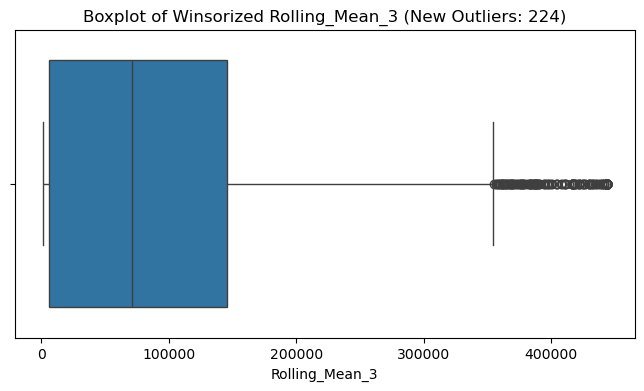

'Rolling_Mean_3' final range: [1230.00, 443750.00]
New outliers detected by IQR: 224
------------------------------


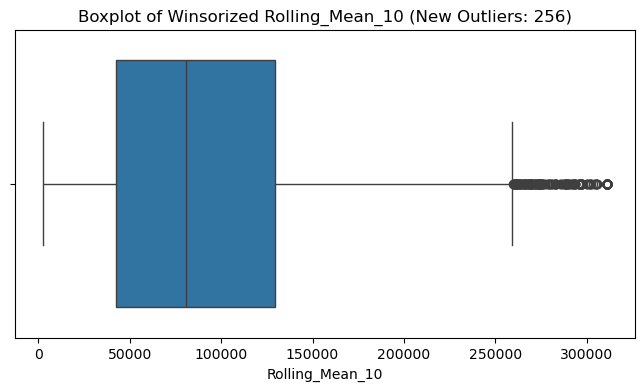

'Rolling_Mean_10' final range: [2652.40, 310837.10]
New outliers detected by IQR: 256
------------------------------


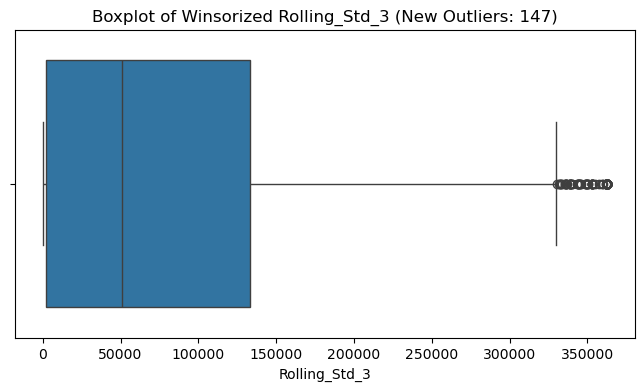

'Rolling_Std_3' final range: [223.24, 362336.09]
New outliers detected by IQR: 147
------------------------------


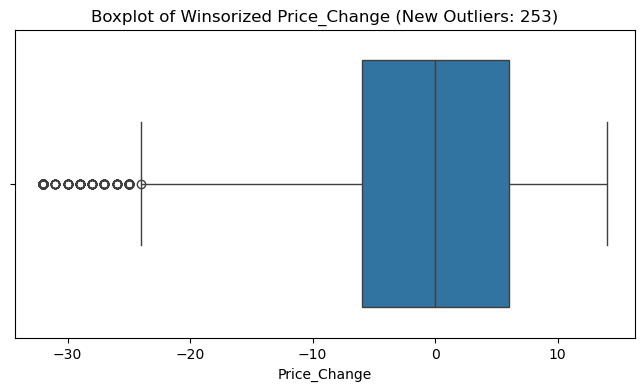

'Price_Change' final range: [-32.00, 14.00]
New outliers detected by IQR: 253
------------------------------


In [37]:
# Columns confirmed to require treatment
cols_to_winsorize = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 
                'Lag_1_Sales', 'Lag_7_Sales', 'Rolling_Mean_3', 'Rolling_Mean_10', 'Rolling_Std_3', 'Price_Change']

print("=" * 60)
print("FINAL TARGETED WINSORIZATION & VERIFICATION")
print("=" * 60)

# Apply Final Targeted Winsorization 
# This block applies the final, most aggressive cap needed for each feature.
for col in cols_to_winsorize:
    if col in ['Total Sales', 'Operating Profit', 'Units Sold', 'Lag_1_Sales', 'Lag_7_Sales', 'Price_Change']:        
    # Aggressive cap for high-skew sales/profit features
        df[col] = winsorize(df[col], limits=[0.01, 0.10])
    else:
        # Standard 1% cap for Price, Margins, and Volatility (Rolling_Std_3)
        df[col] = winsorize(df[col], limits=[0.01, 0.01])

print("Winsorization limits adjusted (Unemployment: 1% lower, 10% upper) and applied.")

# Display summary statistics after the final adjustment
print("Summary Statistics After Final Targeted Winsorization:")
display(df[cols_to_winsorize].describe())

# Verification Check
print("\nVERIFYING OUTLIER REMOVAL VIA BOXPLOTS:")

# Suppress the NumPy UserWarnings for clean output during quantile calculation
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    
    for col in cols_to_winsorize:
        # Recalculate IQR bounds based on the final winsorized data
        Q1_final = df[col].quantile(0.25)
        Q3_final = df[col].quantile(0.75)
        IQR_final = Q3_final - Q1_final
        lower_bound_final = Q1_final - 1.5 * IQR_final
        upper_bound_final = Q3_final + 1.5 * IQR_final

        # Find outliers in the final winsorized data
        outlier_count_new = len(df[(df[col] < lower_bound_final) | (df[col] > upper_bound_final)])

        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
         # Trigger image of final clean distribution

        plt.title(f'Boxplot of Winsorized {col} (New Outliers: {outlier_count_new})')
        plt.show()

        print(f"'{col}' final range: [{df[col].min():.2f}, {df[col].max():.2f}]")
        print(f"New outliers detected by IQR: {outlier_count_new}")
        print("-" * 30)

## Converting and Encoding Categorical Variables to Numerical Variables

In [38]:
# One-Hot Encoding for 'Season' and 'Sales Method' 
df = pd.get_dummies(df, columns=['Season', 'Sales Method'], prefix=['Season', 'Method'], drop_first=False)

In [39]:
# Factorizing (Label Encoding) High-Cardinality Features
# Using factorize for Region, State, City, Product, and Retailer keeps the column count manageable
df['Region'] = pd.factorize(df['Region'])[0]
df['State'] = pd.factorize(df['State'])[0]
df['City'] = pd.factorize(df['City'])[0]
df['Product'] = pd.factorize(df['Product'])[0]
df['Retailer'] = pd.factorize(df['Retailer'])[0]

In [40]:
# Identify all boolean columns (from get_dummies) and convert to int64
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype('int64')

In [41]:
df

Retailer  Retailer ID Invoice Date  Region  State  City  Product  Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin  Year  Quarter  Month  Week  Day    Lag_1_Sales   Lag_7_Sales  Rolling_Mean_3  Rolling_Mean_10  Rolling_Std_3  Price_Change  Season_Autumn  Season_Spring  Season_Summer  Season_Winter  Method_In-store  Method_Online  Method_Outlet
2439         0      1185732   2021-01-13       0      0     0        0            35.0         575     271250.0         108500.00              0.40  2021        1      1     2   13   93326.348787  93384.182594    93228.940187     93093.365676   81165.544752           0.0              0              0              0              1                0              1              0
2440         0      1185732   2021-01-13       0      0     0        1            35.0         575     201250.0          70437.50              0.35  2021        1      1     2   13  271250.000000  93384.182594    93228.940187     93093.365676   81165.544752           0.0              0              0              0              1                0              1              0
2441         0      1185732   2021-01-13       0      0     0        2            25.0         575     143750.0          57500.00              0.40  2021        1      1     2   13  201250.000000  93384.182594    93228.940187     93093.365676   81165.544752         -10.0              0              0              0              1                0              1              0
2442         0      1185732   2021-01-13       0      0     0        3            30.0         425     127500.0          51000.00              0.40  2021        1      1     2   13  143750.000000  93384.182594   205416.666667     93093.365676   63852.042515           5.0              0              0              0              1                0              1              0
2443         0      1185732   2021-01-13       0      0     0        4            45.0         475     213750.0          74812.50              0.35  2021        1      1     2   13  127500.000000  93384.182594   157500.000000     93093.365676   38750.000000          14.0              0              0              0              1                0              1              0
...        ...          ...          ...     ...    ...   ...      ...             ...         ...          ...               ...               ...   ...      ...    ...   ...  ...            ...           ...             ...              ...            ...           ...            ...            ...            ...            ...              ...            ...            ...
8698         5      1128299   2021-12-23       3     47     7        1            56.0         233      13048.0           5219.20              0.40  2021        4     12    51   23   11475.000000  11468.000000    11457.333333    133592.200000    1872.562505           5.0              0              0              0              1                0              0              1
8699         5      1128299   2021-12-23       3     47     7        2            48.0         193       9264.0           3798.24              0.41  2021        4     12    51   23   13048.000000  15696.000000    12614.666667     96397.000000     996.374595          -8.0              0              0              0              1                0              0              1
8700         5      1128299   2021-12-23       3     47     7        3            53.0         165       8745.0           3410.55              0.39  2021        4     12    51   23    9264.000000  11055.000000    11262.333333     59323.400000    1900.943012           5.0              0              0              0              1                0              0              1
8701         5      1128299   2021-12-23       3     47     7        4            54.0         157       8478.0           3984.66              0.47  2021        4     12    51   23    8745.000000   9581.000000    103

In [42]:
df.dtypes

Retailer                     int64
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                       int64
State                        int64
City                         int64
Product                      int64
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Year                         int32
Quarter                      int32
Month                        int32
Week                         int64
Day                          int32
Lag_1_Sales                float64
Lag_7_Sales                float64
Rolling_Mean_3             float64
Rolling_Mean_10            float64
Rolling_Std_3              float64
Price_Change               float64
Season_Autumn                int64
Season_Spring                int64
Season_Summer                int64
Season_Winter                int64
Method_In-store              int64
Method_Online       

In [43]:
df.shape

(9648, 30)

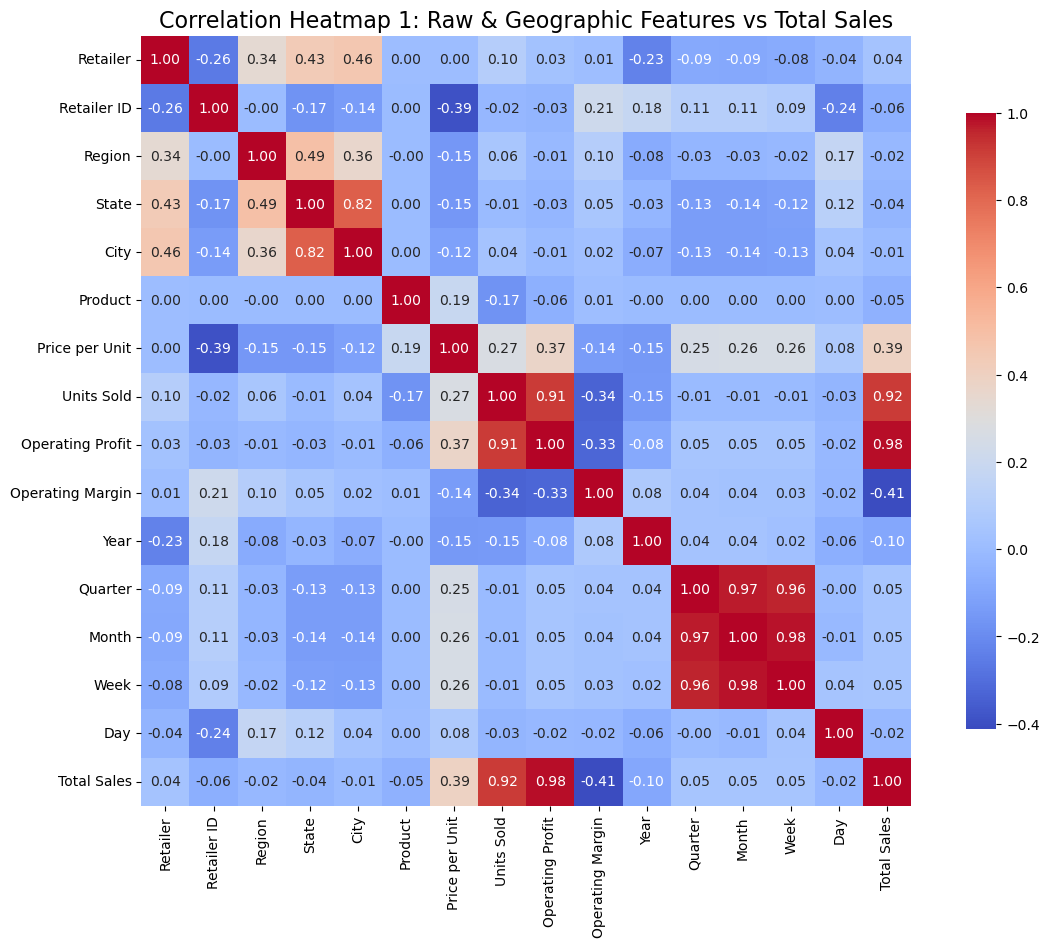

In [44]:
# Group 1: Raw Financials, Geographic (Factorized), and Temporal Features
group1_cols = [
    'Retailer', 'Retailer ID', 'Region', 'State', 'City', 'Product', 'Price per Unit', 
    'Units Sold', 'Operating Profit', 'Operating Margin', 'Year', 
    'Quarter', 'Month', 'Week', 'Day', 'Total Sales'
]

# Heatmap 1: Raw & Geographic Features
plt.figure(figsize=(14, 10))
sns.heatmap(df[group1_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap 1: Raw & Geographic Features vs Total Sales", fontsize=16)
plt.show()

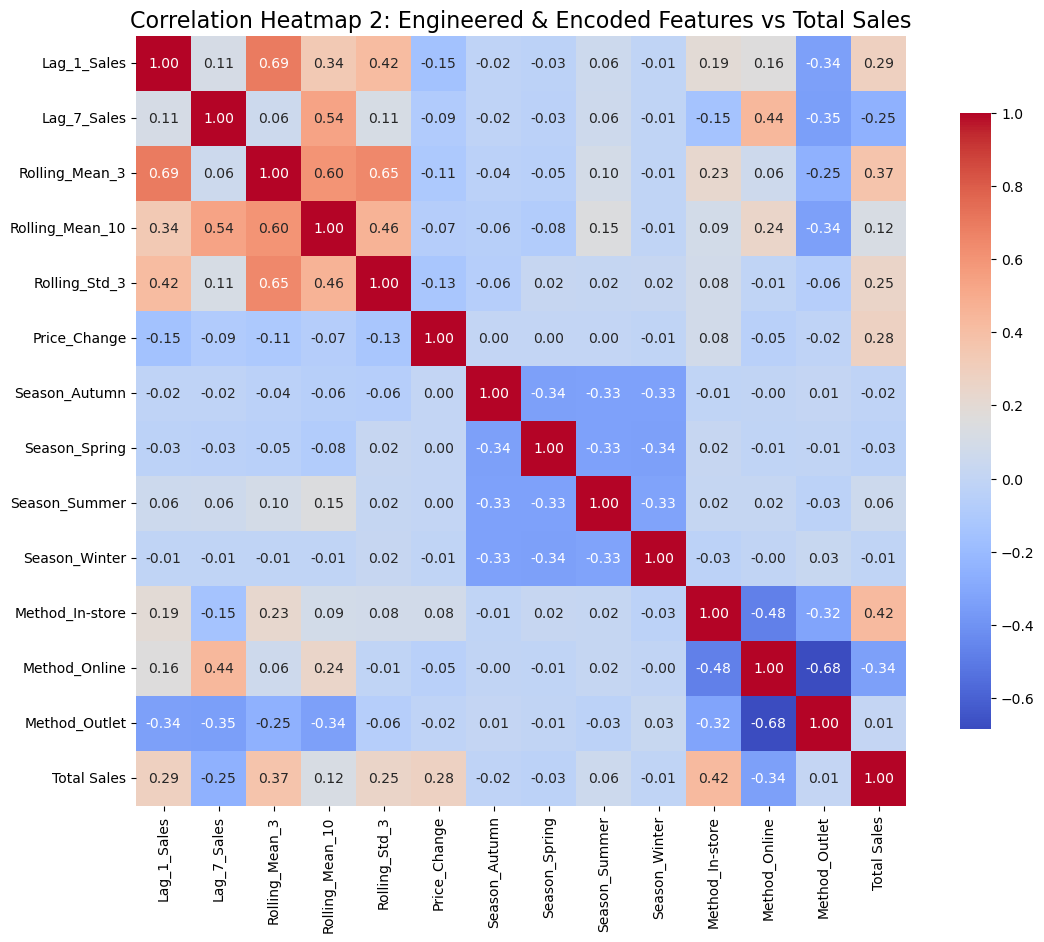

In [45]:
# Group 2: Time-Series (Lags/Rolling) and Encoded (Season/Method) Features
group2_cols = [
    'Lag_1_Sales', 'Lag_7_Sales', 'Rolling_Mean_3', 'Rolling_Mean_10', 
    'Rolling_Std_3', 'Price_Change', 'Season_Autumn', 'Season_Spring', 
    'Season_Summer', 'Season_Winter', 'Method_In-store', 'Method_Online', 
    'Method_Outlet', 'Total Sales'
]

# Heatmap 2: Engineered & Encoded Features
plt.figure(figsize=(14, 10))
sns.heatmap(df[group2_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap 2: Engineered & Encoded Features vs Total Sales", fontsize=16)
plt.show()

## Save the Preprocessed Adidas Dataset to Prepare for Modelling

In [46]:
df.to_csv('adidas_preprocessed.csv', index=False)
print('adidas_preprocessed.csv has been saved.')

adidas_preprocessed.csv has been saved.
